# PPplot

The notebook is using PPviz in order to plot the different graphs.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

## Data visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import json
import glob
import shutil
import os
opj = os.path.join

from PPviz import *
out_path = '/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics'
paths = glob.glob('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/*')
logpath = [p for p in paths if os.path.isdir(p) and 'sub-001_ses-1' in p or 'sub-001_ses-2' in p or 'sub-001_ses-3' in p or 'sub-002_ses-1' in p or 'sub-002_ses-2' in p or 'sub-012_ses-3' in p]

In [2]:
from PPviz import *

In [3]:
task_viz = PPviz(paths, out_path)
#task_viz = PPviz(logpath, out_path)

no event or settings file found


In [ ]:
task_viz.fit_all()

CD group plot finished
ASC group plot finished.
SE group plot finished.
CS group plot finished
EHDB group plot finsihed


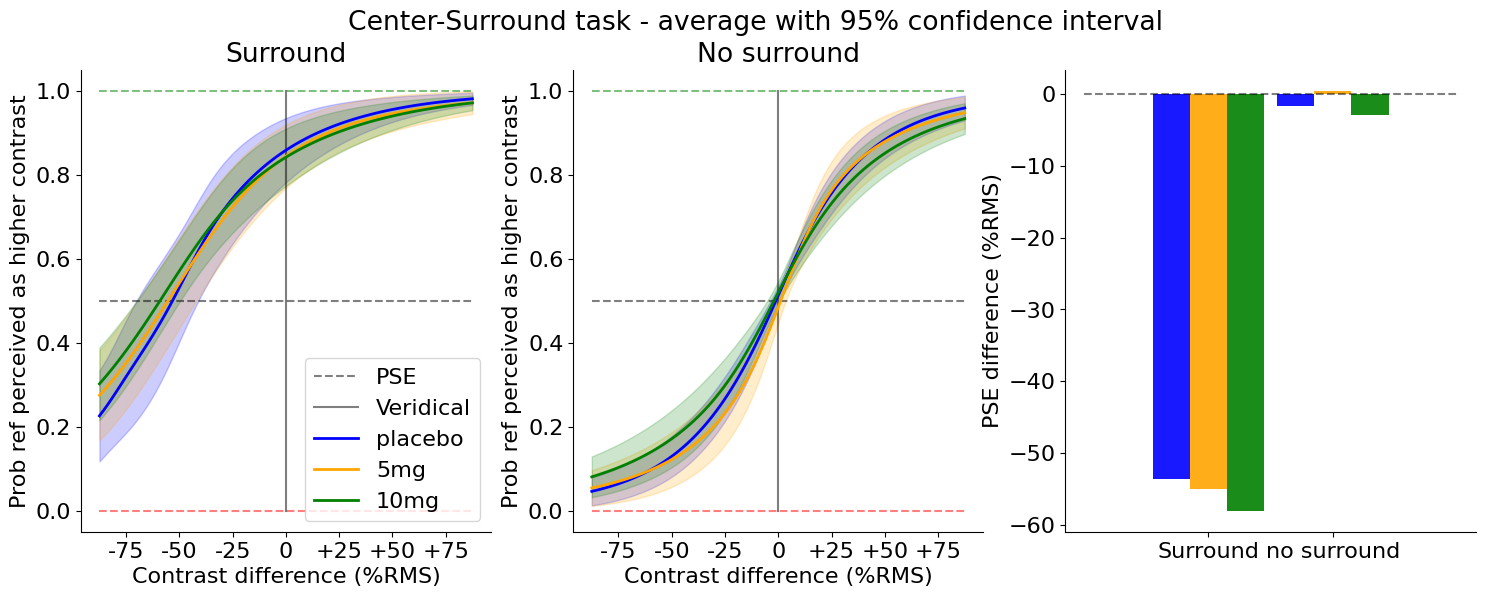

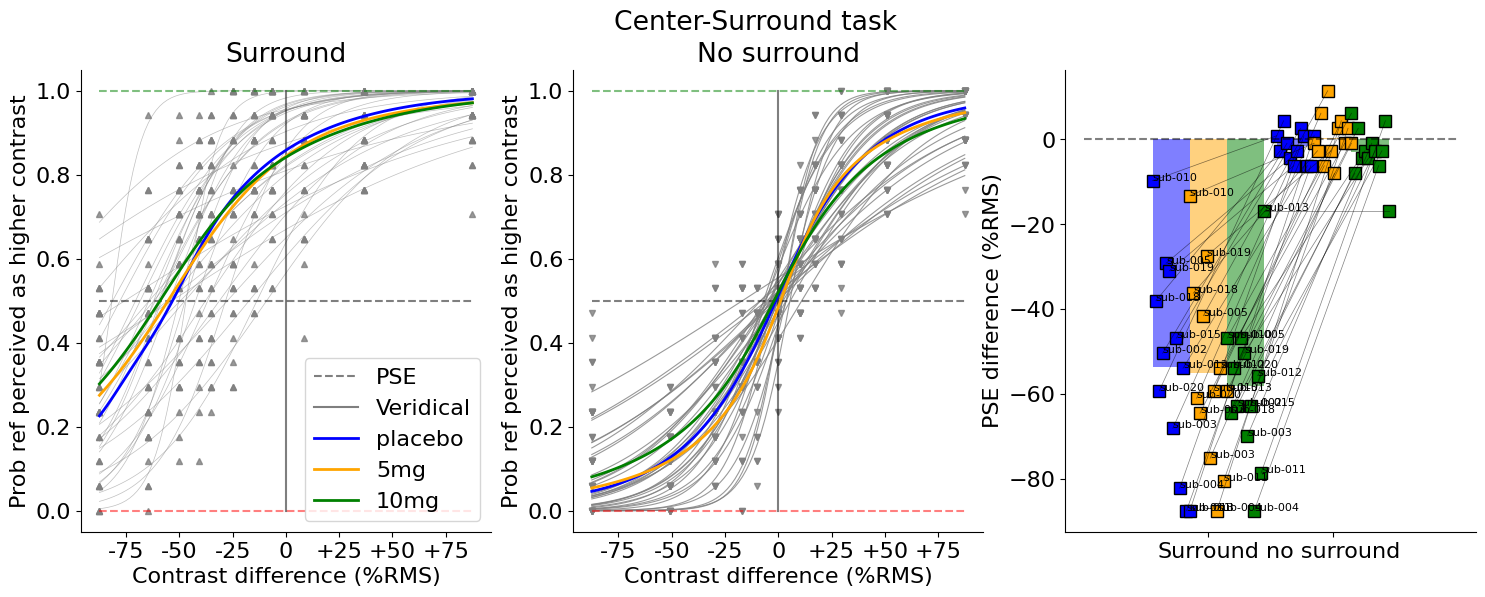

In [4]:
task_viz.plot_group()

In [ ]:

task_viz.plot_all()
pl.close('all')


# Plots by categories

In [3]:
#np.load group_average_ASC.npy in out_path
group_results_ASC = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_ASC_10.npy', allow_pickle=True).item()
group_average_ASC = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_average_ASC_10.npy', allow_pickle=True).item()



In [ ]:
group_results_ASC

In [ ]:
group_average_ASC

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


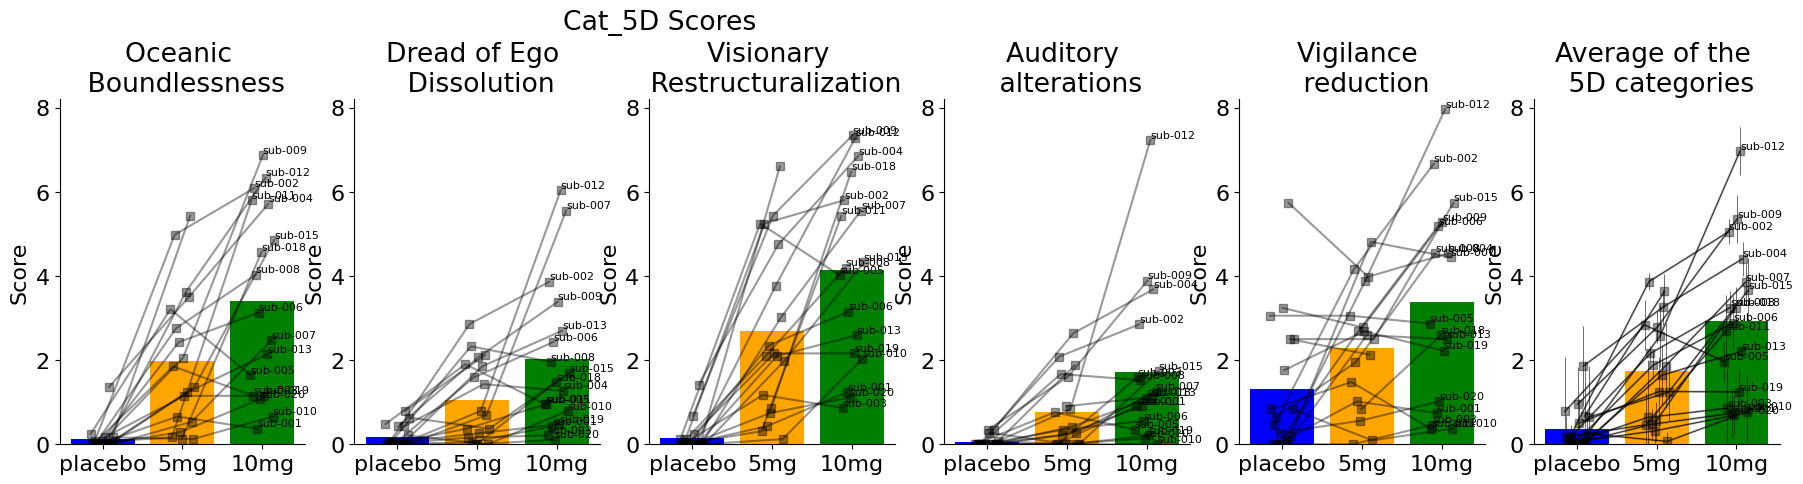

In [70]:
# Initialize the figure
fig3, ax3 = pl.subplots(1, 6, figsize=(16, 5))
run_labels = np.array([0.0, 1.0, 2.0])
categories_labels = ['Oceanic \n Boundlessness', 'Dread of Ego \n Dissolution', 'Visionary \n Restructuralization', 'Auditory \n alterations', 'Vigilance \n reduction']
#for each cat_5D, plot the bar plot of group_average_ASC for eahc of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['OBN', 'DED', 'VRS', 'AUA', 'VIR']):
    #print(cat)
    #print(group_average_ASC[cat])
    ax3[i].bar(run_labels, [group_average_ASC['placebo']['cat_5D']['mean'][cat],group_average_ASC['5mg']['cat_5D']['mean'][cat],group_average_ASC['10mg']['cat_5D']['mean'][cat]], color=['blue', 'orange', 'green'])
    ax3[i].set_title(categories_labels[i])
    ax3[i].set_ylim([0, 8.2])
    ax3[i].set_ylabel('Score')

#6th plot with the average of the 5D categories
group_average_ASC_placebo_cat_5D_mean = np.mean([group_average_ASC['placebo']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
group_average_ASC_5mg_cat_5D_mean = np.mean([group_average_ASC['5mg']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
group_average_ASC_10mg_cat_5D_mean = np.mean([group_average_ASC['10mg']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
ax3[5].bar(run_labels, [group_average_ASC_placebo_cat_5D_mean, group_average_ASC_5mg_cat_5D_mean, group_average_ASC_10mg_cat_5D_mean], color=['blue', 'orange', 'green'])
ax3[5].set_title('Average of the \n 5D categories')
ax3[5].set_ylim([0, 8.2])
ax3[5].set_ylabel('Score')
    
the_space = np.linspace(-0.15, 0.15, (group_results_ASC.items().__len__()))
participant_list = list(group_results_ASC.keys())

#then, for each participant, each session, each condition, plot the scatter plot of the cat_5D score for each of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['OBN', 'DED', 'VRS', 'AUA', 'VIR']):

    run_labels = np.array([0.0, 1.0, 2.0])

    for participant, sessions in group_results_ASC.items():
        P510 = {}
        S510 = {}
        for session, res in sessions.items() :
            #we want, in order, placebo, 5mg, 10mg
            if res['type'] == 'placebo':
                P510['placebo'] = res['cat_5D']['mean'][cat]
                S510['placebo'] = res['cat_5D']['std_dev'][cat]
            elif res['type'] == '5mg':
                P510['5mg'] = res['cat_5D']['mean'][cat]
                S510['5mg'] = res['cat_5D']['std_dev'][cat]
            elif res['type'] == '10mg':
                P510['10mg'] = res['cat_5D']['mean'][cat]
                S510['10mg'] = res['cat_5D']['std_dev'][cat]
            #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
            if 'placebo' not in P510:
                P510['placebo'] = np.nan
                S510['placebo'] = np.nan
            elif '5mg' not in P510:
                P510['5mg'] = np.nan
                S510['5mg'] = np.nan
            elif '10mg' not in P510:
                P510['10mg'] = np.nan
                S510['10mg'] = np.nan

        run_labels += the_space[participant_list.index(participant)]  

        ax3[i].plot(run_labels, [P510['placebo'], P510['5mg'], P510['10mg']], alpha=0.4, marker='s', color='black')
        #standard deviation
        #ax3[i].errorbar(run_labels, [P510['placebo'], P510['5mg'], P510['10mg']], yerr=[S510['placebo']/2, S510['5mg']/2, S510['10mg']/2], color='black', linewidth=0.4)

        #Add participant number to the plot
        ax3[i].text(run_labels[2], P510['10mg']+0.05, participant, fontsize=8)
        run_labels = np.array([0.0, 1.0, 2.0])
        
    
    ax3[i].set_xticks([0, 1, 2])
    ax3[i].set_xticklabels(['placebo', '5mg', '10mg'])

#6th plot with the average of the 5D categories
group_results_ASC_placebo_cat_5D_mean = []
group_results_ASC_5mg_cat_5D_mean = []
group_results_ASC_10mg_cat_5D_mean = []

group_results_ASC_placebo_cat_5D_std = []
group_results_ASC_5mg_cat_5D_std = []
group_results_ASC_10mg_cat_5D_std = []

for participant, sessions in group_results_ASC.items():
    P510 = {}
    S510 = {}
    for session, res in sessions.items() :
        #we want, in order, placebo, 5mg, 10mg
        if res['type'] == 'placebo':
            P510['placebo'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
            S510['placebo'] = np.std([res['cat_5D']['std_dev'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        elif res['type'] == '5mg':
            P510['5mg'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
            S510['5mg'] = np.std([res['cat_5D']['std_dev'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        elif res['type'] == '10mg':
            P510['10mg'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
            S510['10mg'] = np.std([res['cat_5D']['std_dev'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
        if 'placebo' not in P510:
            P510['placebo'] = np.nan
            S510['placebo'] = np.nan
        elif '5mg' not in P510:
            P510['5mg'] = np.nan
            S510['5mg'] = np.nan
        elif '10mg' not in P510:
            P510['10mg'] = np.nan
            S510['10mg'] = np.nan

    group_results_ASC_placebo_cat_5D_mean.append(P510['placebo'])
    group_results_ASC_5mg_cat_5D_mean.append(P510['5mg'])
    group_results_ASC_10mg_cat_5D_mean.append(P510['10mg'])

    group_results_ASC_placebo_cat_5D_std.append(S510['placebo'])
    group_results_ASC_5mg_cat_5D_std.append(S510['5mg'])
    group_results_ASC_10mg_cat_5D_std.append(S510['10mg'])

for i, participant in enumerate(participant_list):
    run_labels += the_space[participant_list.index(participant)]

    ax3[5].plot(run_labels, [group_results_ASC_placebo_cat_5D_mean[i], group_results_ASC_5mg_cat_5D_mean[i], group_results_ASC_10mg_cat_5D_mean[i]], alpha=0.4, marker='s', color='black')
    #standard deviation
    ax3[5].errorbar(run_labels, [group_results_ASC_placebo_cat_5D_mean[i], group_results_ASC_5mg_cat_5D_mean[i], group_results_ASC_10mg_cat_5D_mean[i]], yerr=[group_results_ASC_placebo_cat_5D_std[i], group_results_ASC_5mg_cat_5D_std[i], group_results_ASC_10mg_cat_5D_std[i]], color='black', linewidth=0.4)

    #Add participant number to the plot
    ax3[5].text(run_labels[2], group_results_ASC_10mg_cat_5D_mean[i]+0.05, participant, fontsize=8)
    run_labels = np.array([0.0, 1.0, 2.0])

ax3[5].set_xticks([0, 1, 2])
ax3[5].set_xticklabels(['placebo', '5mg', '10mg'])

fig3.subplots_adjust(top=0.8, right=1.2)

#put title on the top of the figure trandformed 1.2
fig3.suptitle('Cat_5D Scores')

fig3.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


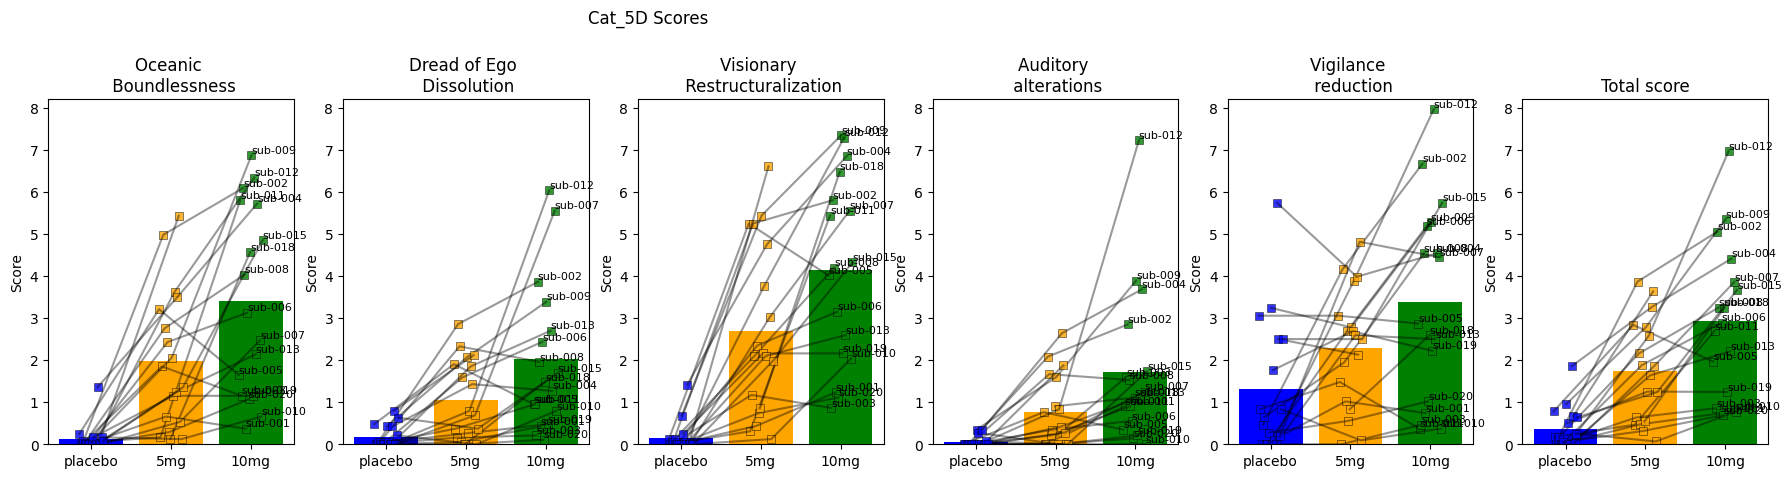

In [5]:
# Initialize the figure
fig3, ax3 = pl.subplots(1, 6, figsize=(16, 5))
run_labels = np.array([0.0, 1.0, 2.0])
categories_labels = ['Oceanic \n Boundlessness', 'Dread of Ego \n Dissolution', 'Visionary \n Restructuralization', 'Auditory \n alterations', 'Vigilance \n reduction']
#for each cat_5D, plot the bar plot of group_average_ASC for eahc of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['OBN', 'DED', 'VRS', 'AUA', 'VIR']):
    #print(cat)
    #print(group_average_ASC[cat])
    ax3[i].bar(run_labels, [group_average_ASC['placebo']['cat_5D']['mean'][cat],group_average_ASC['5mg']['cat_5D']['mean'][cat],group_average_ASC['10mg']['cat_5D']['mean'][cat]], color=['blue', 'orange', 'green'])
    ax3[i].set_title(categories_labels[i])
    ax3[i].set_ylim([0, 8.2])
    ax3[i].set_ylabel('Score')

#6th plot with the average of the 5D categories
group_average_ASC_placebo_cat_5D_mean = np.mean([group_average_ASC['placebo']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
group_average_ASC_5mg_cat_5D_mean = np.mean([group_average_ASC['5mg']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
group_average_ASC_10mg_cat_5D_mean = np.mean([group_average_ASC['10mg']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
ax3[5].bar(run_labels, [group_average_ASC_placebo_cat_5D_mean, group_average_ASC_5mg_cat_5D_mean, group_average_ASC_10mg_cat_5D_mean], color=['blue', 'orange', 'green'])
ax3[5].set_title('Total score')
ax3[5].set_ylim([0, 8.2])
ax3[5].set_ylabel('Score')
    
the_space = np.linspace(-0.15, 0.15, (group_results_ASC.items().__len__()))
participant_list = list(group_results_ASC.keys())

#then, for each participant, each session, each condition, plot the scatter plot of the cat_5D score for each of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['OBN', 'DED', 'VRS', 'AUA', 'VIR']):

    run_labels = np.array([0.0, 1.0, 2.0])

    for participant, sessions in group_results_ASC.items():
        P510 = {}
        S510 = {}
        for session, res in sessions.items() :
            #we want, in order, placebo, 5mg, 10mg
            if res['type'] == 'placebo':
                P510['placebo'] = res['cat_5D']['mean'][cat]
                S510['placebo'] = res['cat_5D']['std_dev'][cat]
            elif res['type'] == '5mg':
                P510['5mg'] = res['cat_5D']['mean'][cat]
                S510['5mg'] = res['cat_5D']['std_dev'][cat]
            elif res['type'] == '10mg':
                P510['10mg'] = res['cat_5D']['mean'][cat]
                S510['10mg'] = res['cat_5D']['std_dev'][cat]
            #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
            if 'placebo' not in P510:
                P510['placebo'] = np.nan
                S510['placebo'] = np.nan
            elif '5mg' not in P510:
                P510['5mg'] = np.nan
                S510['5mg'] = np.nan
            elif '10mg' not in P510:
                P510['10mg'] = np.nan
                S510['10mg'] = np.nan

        run_labels += the_space[participant_list.index(participant)]  

        #loop over conditions to plot the points with colors corresponding to the condition
        for j, condition in enumerate(['placebo', '5mg', '10mg']):
            ax3[i].plot(run_labels[j], P510[condition], alpha=0.8, marker='s', color=['blue', 'orange', 'green'][j], markeredgecolor='black', markeredgewidth=0.4)

        #Add the links between the points
        ax3[i].plot(run_labels, [P510['placebo'], P510['5mg'], P510['10mg']], alpha=0.4, color='black')
        
        #standard deviation
        #ax3[i].errorbar(run_labels, [P510['placebo'], P510['5mg'], P510['10mg']], yerr=[S510['placebo']/2, S510['5mg']/2, S510['10mg']/2], color='black', linewidth=0.4)

        #Add participant number to the plot
        ax3[i].text(run_labels[2], P510['10mg']+0.05, participant, fontsize=8)
        run_labels = np.array([0.0, 1.0, 2.0])
        
    
    ax3[i].set_xticks([0, 1, 2])
    ax3[i].set_xticklabels(['placebo', '5mg', '10mg'])

#6th plot with the average of the 5D categories
group_results_ASC_placebo_cat_5D_mean = []
group_results_ASC_5mg_cat_5D_mean = []
group_results_ASC_10mg_cat_5D_mean = []

group_results_ASC_placebo_cat_5D_std = []
group_results_ASC_5mg_cat_5D_std = []
group_results_ASC_10mg_cat_5D_std = []

for participant, sessions in group_results_ASC.items():
    P510 = {}
    S510 = {}
    for session, res in sessions.items() :
        #we want, in order, placebo, 5mg, 10mg
        if res['type'] == 'placebo':
            P510['placebo'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
            S510['placebo'] = np.std([res['cat_5D']['std_dev'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        elif res['type'] == '5mg':
            P510['5mg'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
            S510['5mg'] = np.std([res['cat_5D']['std_dev'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        elif res['type'] == '10mg':
            P510['10mg'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
            S510['10mg'] = np.std([res['cat_5D']['std_dev'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
        if 'placebo' not in P510:
            P510['placebo'] = np.nan
            S510['placebo'] = np.nan
        elif '5mg' not in P510:
            P510['5mg'] = np.nan
            S510['5mg'] = np.nan
        elif '10mg' not in P510:
            P510['10mg'] = np.nan
            S510['10mg'] = np.nan

    group_results_ASC_placebo_cat_5D_mean.append(P510['placebo'])
    group_results_ASC_5mg_cat_5D_mean.append(P510['5mg'])
    group_results_ASC_10mg_cat_5D_mean.append(P510['10mg'])

    group_results_ASC_placebo_cat_5D_std.append(S510['placebo'])
    group_results_ASC_5mg_cat_5D_std.append(S510['5mg'])
    group_results_ASC_10mg_cat_5D_std.append(S510['10mg'])

for i, participant in enumerate(participant_list):
    run_labels += the_space[participant_list.index(participant)]

    #loop over conditions to plot the points with colors corresponding to the condition
    for j, condition in enumerate(['placebo', '5mg', '10mg']):
        ax3[5].plot(run_labels[j], [group_results_ASC_placebo_cat_5D_mean[i], group_results_ASC_5mg_cat_5D_mean[i], group_results_ASC_10mg_cat_5D_mean[i]][j], alpha=0.8, marker='s', color=['blue', 'orange', 'green'][j], markeredgecolor='black', markeredgewidth=0.4)

    #Add the links between the points
    ax3[5].plot(run_labels, [group_results_ASC_placebo_cat_5D_mean[i], group_results_ASC_5mg_cat_5D_mean[i], group_results_ASC_10mg_cat_5D_mean[i]], alpha=0.4, color='black')

    #standard deviation
    #ax3[5].errorbar(run_labels, [group_results_ASC_placebo_cat_5D_mean[i], group_results_ASC_5mg_cat_5D_mean[i], group_results_ASC_10mg_cat_5D_mean[i]], yerr=[group_results_ASC_placebo_cat_5D_std[i], group_results_ASC_5mg_cat_5D_std[i], group_results_ASC_10mg_cat_5D_std[i]], color='black', linewidth=0.4)

    #Add participant number to the plot
    ax3[5].text(run_labels[2], group_results_ASC_10mg_cat_5D_mean[i]+0.05, participant, fontsize=8)
    run_labels = np.array([0.0, 1.0, 2.0])

ax3[5].set_xticks([0, 1, 2])
ax3[5].set_xticklabels(['placebo', '5mg', '10mg'])

fig3.subplots_adjust(top=0.8, right=1.2)

#put title on the top of the figure trandformed 1.2
fig3.suptitle('Cat_5D Scores')

fig3.show()

11D

Text(0.5, 0.98, 'Cat_11D Scores')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

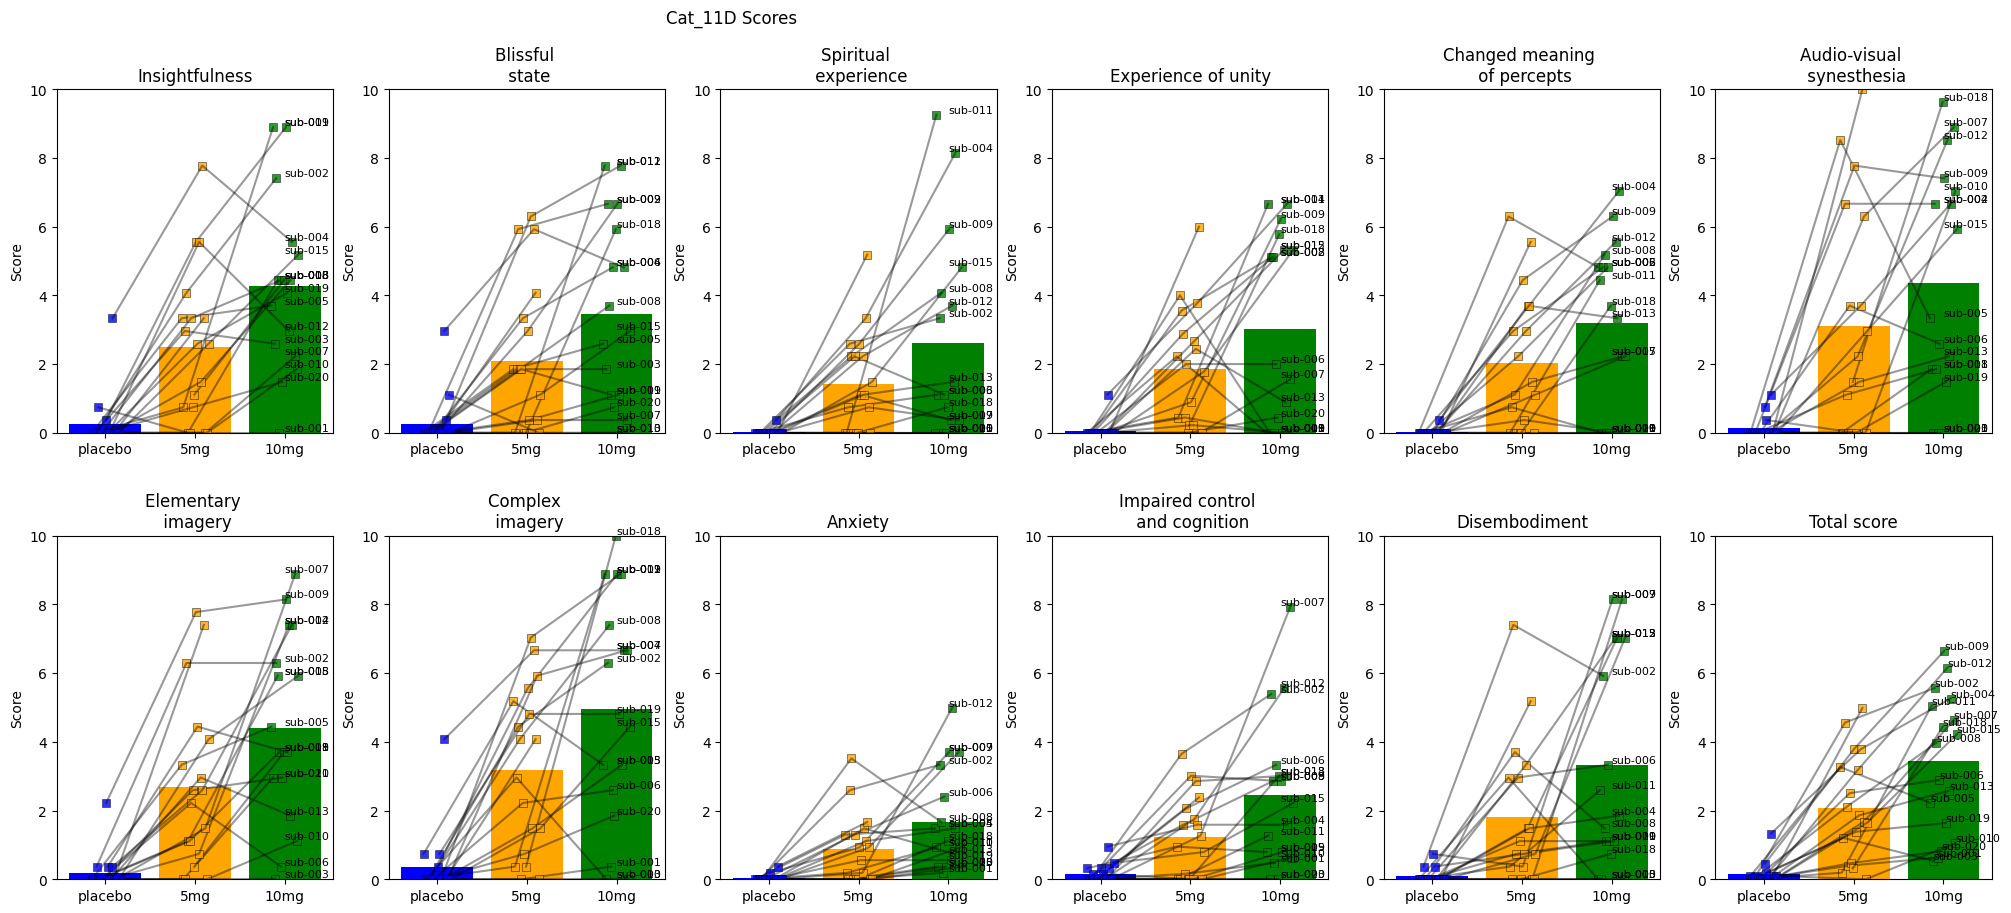

In [6]:
# Initialize the figure
fig4, ax4 = pl.subplots(2, 6, figsize=(18, 10))
run_labels = np.array([0.0, 1.0, 2.0])
categories_labels = ['Insightfulness', 'Blissful \n state', 'Spiritual \n experience', 'Experience of unity', 'Changed meaning \n of percepts', 'Audio-visual \n synesthesia', 'Elementary \n imagery', 'Complex \n imagery', 'Anxiety', 'Impaired control \n and cognition', 'Disembodiment']
#for each cat_11D, plot the bar plot of group_average_ASC for eahc of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']):
    #x equal i modulo 6 because we have 6 rows of 2 columns
    y = i % 6
    #y equal i divided by 6 because we have 6 rows of 2 columns
    x = i // 6
    #print(cat)
    #print(group_average_ASC[cat])
    ax4[x,y].bar(run_labels, [group_average_ASC['placebo']['cat_11D']['mean'][cat],group_average_ASC['5mg']['cat_11D']['mean'][cat],group_average_ASC['10mg']['cat_11D']['mean'][cat]], color=['blue', 'orange', 'green'])
    ax4[x,y].set_title(categories_labels[i])
    ax4[x,y].set_ylim([0, 10])
    ax4[x,y].set_ylabel('Score')

the_space = np.linspace(-0.15, 0.15, (group_results_ASC.items().__len__()))
participant_list = list(group_results_ASC.keys())

#then, for each participant, each session, each condition, plot the scatter plot of the cat_11D score for each of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']):
    run_labels = np.array([0.0, 1.0, 2.0])
    #x equal i modulo 6 because we have 6 rows of 2 columns
    y = i % 6
    #y equal i divided by 6 because we have 6 rows of 2 columns
    x = i // 6

    for participant, sessions in group_results_ASC.items():
        P510 = {}
        for session, res in sessions.items() :
            #we want, in order, placebo, 5mg, 10mg
            if res['type'] == 'placebo':
                P510['placebo'] = res['cat_11D']['mean'][cat]
            elif res['type'] == '5mg':
                P510['5mg'] = res['cat_11D']['mean'][cat]
            elif res['type'] == '10mg':
                P510['10mg'] = res['cat_11D']['mean'][cat]
            #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
            if 'placebo' not in P510:
                P510['placebo'] = np.nan
            elif '5mg' not in P510:
                P510['5mg'] = np.nan
            elif '10mg' not in P510:
                P510['10mg'] = np.nan

        run_labels += the_space[participant_list.index(participant)]
        #loop over conditions to plot the points with colors corresponding to the condition
        for j, condition in enumerate(['placebo', '5mg', '10mg']):
            ax4[x,y].plot(run_labels[j], P510[condition], alpha=0.8, marker='s', color=['blue', 'orange', 'green'][j], markeredgecolor='black', markeredgewidth=0.4)

        #Add the links between the points
        ax4[x,y].plot(run_labels, [P510['placebo'], P510['5mg'], P510['10mg']], alpha=0.4, color='black')
        
        run_labels = np.array([0.0, 1.0, 2.0])

        #Add participant number to the plot
        ax4[x,y].text(run_labels[2], P510['10mg']+0.05, participant, fontsize=8)

    ax4[x,y].set_xticks([0, 1, 2])
    ax4[x,y].set_xticklabels(['placebo', '5mg', '10mg'])
""" 
# Remove the last subplot
fig4.delaxes(ax4[1, 5])
# Set a text box on the upper right listing the accronyms of the 11D categories
textstr2 = '\n'.join((f"11D categories:",
                    f"EU: Experience of unity",
                    f"SE: Spiritual experience",
                    f"BS: Blissful state",
                    f"IS: Insightfulness",
                    f"DE: Disembodiment",
                    f"ICC: Impaired control and cognition",
                    f"ANX: Anxiety",
                    f"CI: Complex imagery",
                    f"EI: Elementary imagery",
                    f"AVS: Audio-visual synesthesia",
                    f"CMP: Changed meaning of percepts"))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax4[1, 4].text(2.9, 1, textstr2, fontsize=10, bbox=props) """

#the last subplot ax4[1, 4] with the total score i.e. average of all dimensions for each Subject and the group
group_average_ASC_placebo_total = np.mean([group_average_ASC['placebo']['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
group_average_ASC_5mg_total = np.mean([group_average_ASC['5mg']['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
group_average_ASC_10mg_total = np.mean([group_average_ASC['10mg']['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
ax4[1,5].bar(run_labels, [group_average_ASC_placebo_total, group_average_ASC_5mg_total, group_average_ASC_10mg_total], color=['blue', 'orange', 'green'])
ax4[1,5].set_title('Total score')
ax4[1,5].set_ylim([0, 10])
ax4[1,5].set_ylabel('Score')

group_results_ASC_participants_placebo_total = []
group_results_ASC_participants_5mg_total = []
group_results_ASC_participants_10mg_total = []

group_results_ASC_participants_placebo_std = []
group_results_ASC_participants_5mg_std = []
group_results_ASC_participants_10mg_std = []

for participant, sessions in group_results_ASC.items():
    P510 = {}
    S510 = {}
    for session, res in sessions.items() :
        #we want, in order, placebo, 5mg, 10mg
        if res['type'] == 'placebo':
            P510['placebo'] = np.mean([res['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
            S510['placebo'] = np.std([res['cat_11D']['std_dev'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])            
        elif res['type'] == '5mg':
            P510['5mg'] = np.mean([res['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
            S510['5mg'] = np.std([res['cat_11D']['std_dev'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
        elif res['type'] == '10mg':
            P510['10mg'] = np.mean([res['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
            S510['10mg'] = np.std([res['cat_11D']['std_dev'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
        #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
        if 'placebo' not in P510:
            P510['placebo'] = np.nan
            S510['placebo'] = np.nan
        elif '5mg' not in P510:
            P510['5mg'] = np.nan
            S510['5mg'] = np.nan
        elif '10mg' not in P510:
            P510['10mg'] = np.nan
            S510['10mg'] = np.nan

    group_results_ASC_participants_placebo_total.append(P510['placebo'])
    group_results_ASC_participants_5mg_total.append(P510['5mg'])
    group_results_ASC_participants_10mg_total.append(P510['10mg'])

    group_results_ASC_participants_placebo_std.append(S510['placebo'])
    group_results_ASC_participants_5mg_std.append(S510['5mg'])
    group_results_ASC_participants_10mg_std.append(S510['10mg'])

for i, participant in enumerate(participant_list):
    run_labels += the_space[participant_list.index(participant)]

    #loop over conditions to plot the points with colors corresponding to the condition
    for j, condition in enumerate(['placebo', '5mg', '10mg']):
        ax4[1,5].plot(run_labels[j], [group_results_ASC_participants_placebo_total[i], group_results_ASC_participants_5mg_total[i], group_results_ASC_participants_10mg_total[i]][j], alpha=0.8, marker='s', color=['blue', 'orange', 'green'][j], markeredgecolor='black', markeredgewidth=0.4)

    #Add the links between the points
    ax4[1,5].plot(run_labels, [group_results_ASC_participants_placebo_total[i], group_results_ASC_participants_5mg_total[i], group_results_ASC_participants_10mg_total[i]], alpha=0.4, color='black')

    #standard deviation
    #ax4[1,5].errorbar(run_labels, [group_results_ASC_participants_placebo_total[i], group_results_ASC_participants_5mg_total[i], group_results_ASC_participants_10mg_total[i]], yerr=[group_results_ASC_participants_placebo_std[i], group_results_ASC_participants_5mg_std[i], group_results_ASC_participants_10mg_std[i]], color='black', linewidth=0.4)

    #Add participant number to the plot
    ax4[1,5].text(run_labels[2], group_results_ASC_participants_10mg_total[i]+0.05, participant, fontsize=8)
    run_labels = np.array([0.0, 1.0, 2.0])

ax4[1,5].set_xticks([0, 1, 2])
ax4[1,5].set_xticklabels(['placebo', '5mg', '10mg'])

fig4.subplots_adjust(top=0.9, right=1.2, hspace=0.3)
fig4.suptitle('Cat_11D Scores')


## Anova

11D

In [ ]:
#np.load group_average_ASC.npy in out_path
group_results_ASC = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_ASC_10.npy', allow_pickle=True).item()
group_average_ASC = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_average_ASC_10.npy', allow_pickle=True).item()

### Subjective Experience Questionnaires

let's try to understand better the data of SE questionnaires

In [14]:
log1 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_log.txt', sep='\\t')
log1

/tmp/ipykernel_243872/2682844552.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  log1 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_log.txt', sep='\\t')


,8.9665,WARNING,"We strongly recommend you activate the PTB sound engine in PsychoPy prefs as the preferred audio engine. Its timing is vastly superior. Your prefs are currently set to use ['sounddevice', 'PTB', 'pyo', 'pygame'] (in that order)."
0,10.1116,EXP,Created unnamed Circle = Circle(__class__=<cla...
1,10.1140,EXP,Created unnamed ShapeStim = ShapeStim(__class_...
2,10.1162,EXP,Created unnamed ShapeStim = ShapeStim(__class_...
3,10.1184,EXP,Created unnamed ShapeStim = ShapeStim(__class_...
4,10.1253,EXP,window1: recordFrameIntervals = True
...,...,...,...
8060,110.9618,EXP,Created unnamed TextStim = TextStim(__class__=...
8061,110.9785,EXP,Created unnamed TextStim = TextStim(__class__=...
8062,110.9927,DATA,Keypress: num_0
8063,111.0093,EXP,window1: recordFrameIntervals = False


In [15]:
events = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_events.tsv', sep='\\t')
events2 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-2_Logs20230329114547/sub-001_ses-3_task-SE_run-2_events.tsv', sep='\\t')
events3 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-3_Logs20230329131847/sub-001_ses-3_task-SE_run-3_events.tsv', sep='\\t')
events4 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-4_Logs20230329150019/sub-001_ses-3_task-SE_run-4_events.tsv', sep='\\t')
events3

/tmp/ipykernel_243872/940326573.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  events = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_events.tsv', sep='\\t')
/tmp/ipykernel_243872/940326573.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  events2 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-2_Logs20230329114547/sub-001_ses-3_task-SE_run-2_events.tsv', sep='\\t')
/tmp/ipykernel_243872/940326573.py:3: ParserWarning: Falling back to the 'p

,trial_nr,onset,event_type,phase,response,nr_frames,response_text,time,key_pressed,onset_abs,duration
0,0,0.191469,stim,0.0,NaN,NaN,I experience a disintegration of my 'self' or ...,NaN,NaN,1.303074,NaN
1,0,NaN,begin_next_trial,NaN,NaN,121.0,NaN,2.191886,num_enter,NaN,NaN
2,0,2.207662,stim,0.0,NaN,0.0,I experience a disintegration of my 'self' or ...,NaN,NaN,3.319267,0.001022
3,0,2.208684,stim,0.0,NaN,NaN,I experience a disintegration of my 'self' or ...,NaN,NaN,3.320289,NaN
4,0,NaN,Response,NaN,NaN,789.0,I experience a disintegration of my 'self' or ...,15.340331,num_0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80,19,NaN,Response,NaN,NaN,86.0,Sounds influence what I see.,69.754157,num_0,NaN,NaN
81,20,69.770701,stim,0.0,NaN,25.0,I fear losing control of my mind.,NaN,NaN,70.882306,0.416650
82,20,70.187351,stim,0.0,NaN,0.0,I fear losing control of my mind.,NaN,NaN,71.298956,0.001165
83,20,70.188516,stim,0.0,NaN,NaN,I fear losing control of my mind.,NaN,NaN,71.300121,NaN


In [16]:
SE_question = events.loc[events['key_pressed'].notnull()]
SE_question2 = events2.loc[events2['key_pressed'].notnull()]
SE_question3 = events3.loc[events3['key_pressed'].notnull()]
SE_question4 = events4.loc[events4['key_pressed'].notnull()]

SE_question

,trial_nr,onset,event_type,phase,response,nr_frames,response_text,time,key_pressed,onset_abs,duration
1,0,NaN,begin_next_trial,NaN,NaN,3836.0,NaN,64.212521,space,NaN,NaN
4,0,NaN,Response,NaN,NaN,106.0,My experience has a supernatural quality.,65.986256,num_0,NaN,NaN
8,1,NaN,Response,NaN,NaN,94.0,Things look strange.,67.969849,num_0,NaN,NaN
12,2,NaN,Response,NaN,NaN,86.0,My imagination is extremely vivid.,69.819358,num_0,NaN,NaN
16,3,NaN,Response,NaN,NaN,152.0,I exerience a sense of merging with my surroun...,72.769204,num_0,NaN,NaN
20,4,NaN,Response,NaN,NaN,50.0,I see geometric patterns.,74.019125,num_0,NaN,NaN
24,5,NaN,Response,NaN,NaN,55.0,I feel suspicious and paranoid.,75.352724,num_0,NaN,NaN
28,6,NaN,Response,NaN,NaN,84.0,I feel a profound inner peace.,77.169283,num_2,NaN,NaN
32,7,NaN,Response,NaN,NaN,60.0,Sounds influence what I see.,78.585862,num_0,NaN,NaN
36,8,NaN,Response,NaN,NaN,134.0,My thoughts wander freely.,81.235698,num_3,NaN,NaN


In [17]:
#make an ordered dictionnary with, for each question found in response_text content as key the key_pressed as value. DOn't forget to remove the 'num_' part of the key_pressed and convert it to int. Don't take into account nan response_text
SE_question_dict = {row['response_text']: int(row['key_pressed'][4:]) for index, row in SE_question.iterrows() if row['response_text'] is not np.nan}
SE_question_dict2 = {row['response_text']: int(row['key_pressed'][4:]) for index, row in SE_question2.iterrows() if row['response_text'] is not np.nan}
SE_question_dict3 = {row['response_text']: int(row['key_pressed'][4:]) for index, row in SE_question3.iterrows() if row['response_text'] is not np.nan}
SE_question_dict4 = {row['response_text']: int(row['key_pressed'][4:]) for index, row in SE_question4.iterrows() if row['response_text'] is not np.nan}

SE_question_dict

{'My experience has a supernatural quality.': 0,
 'Things look strange.': 0,
 'My imagination is extremely vivid.': 0,
 'I exerience a sense of merging with my surroundings.': 0,
 'I see geometric patterns.': 0,
 'I feel suspicious and paranoid.': 0,
 'I feel a profound inner peace.': 2,
 'Sounds influence what I see.': 0,
 'My thoughts wander freely.': 3,
 'My perception of time is distorted.': 0,
 'I feel afraid.': 0,
 'My thinking is muddled.': 1,
 'I fear losing control of my mind.': 0,
 'I feel unusual bodily sensations.': 1,
 'My experience has a spiritual or mystical quality.': 0,
 "I experience a disintegration of my 'self' or 'ego'.": 0,
 'I feel like I am floating.': 0,
 'My experience has a dream-like quality.': 0,
 'My sense of space and size is distorted.': 0,
 "I see movement in things that aren't really moving.": 0,
 'Edges appear warped.': 0}

In [18]:
SE_question.shape

(22, 11)

In [19]:
SE_question_dict

{'My experience has a supernatural quality.': 0,
 'Things look strange.': 0,
 'My imagination is extremely vivid.': 0,
 'I exerience a sense of merging with my surroundings.': 0,
 'I see geometric patterns.': 0,
 'I feel suspicious and paranoid.': 0,
 'I feel a profound inner peace.': 2,
 'Sounds influence what I see.': 0,
 'My thoughts wander freely.': 3,
 'My perception of time is distorted.': 0,
 'I feel afraid.': 0,
 'My thinking is muddled.': 1,
 'I fear losing control of my mind.': 0,
 'I feel unusual bodily sensations.': 1,
 'My experience has a spiritual or mystical quality.': 0,
 "I experience a disintegration of my 'self' or 'ego'.": 0,
 'I feel like I am floating.': 0,
 'My experience has a dream-like quality.': 0,
 'My sense of space and size is distorted.': 0,
 "I see movement in things that aren't really moving.": 0,
 'Edges appear warped.': 0}

In [ ]:
#For the four runs, calculate four average scores corresponding to all questions of the SE task
SE_score = np.mean(list(SE_question_dict.values()))
SE_score2 = np.mean(list(SE_question_dict2.values()))
SE_score3 = np.mean(list(SE_question_dict3.values()))
SE_score4 = np.mean(list(SE_question_dict4.values()))

#plot the four scores in the same plot to see if there is a trend
plt.plot([SE_score, SE_score2, SE_score3, SE_score4])

We could either plot the questions as it is, which would do 20 parameters. We can infer on the possible 11D-ASC dimensions it corresponds 

In [21]:
order = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_trial_order.npy')
order

array([14, 12,  0, 11,  7, 20, 16,  2,  5,  6, 18,  9, 19,  4, 17, 15, 13,
        1,  3, 10,  8])

In [22]:
#reorder the SE_question_dict where the nth element of the 'order' array is the index of the nth element of the 'new_SE_question' array
""" new_SE_question = [np.zeros(21, dtype=object)]
for i, idx in enumerate(order):
    new_SE_question[idx] = SE_question[i]
new_SE_question """


' new_SE_question = [np.zeros(21, dtype=object)]\nfor i, idx in enumerate(order):\n    new_SE_question[idx] = SE_question[i]\nnew_SE_question '

In [23]:
dict_SE_ASC = {
    "My experience has a supernatural quality.": "SE",
    "Things look strange.": "DE",
    "My imagination is extremely vivid.": "IS",
    "I exerience a sense of merging with my surroundings.": "EU",
    "I see geometric patterns.": "CI",
    "I feel suspicious and paranoid.": "ANX",
    "I feel a profound inner peace.": "BS",
    "Sounds influence what I see.": "AVS",
    "My thoughts wander freely.": "IS",
    "My perception of time is distorted.": "ICC",
    "I feel afraid.": "ANX",
    "My thinking is muddled.": "ICC",
    "I fear losing control of my mind.": "ICC",
    "I feel unusual bodily sensations.": "CI",
    "My experience has a spiritual or mystical quality.": "SE",
    "I experience a disintegration of my 'self' or 'ego'.": "EU",
    "I feel like I am floating.": "EU",
    "My experience has a dream-like quality.": "IS",
    "My sense of space and size is distorted.": "ICC",
    "I see movement in things that aren't really moving.": "CI",
    "Edges appear warped.": "CI"
}

In [24]:
#using the dict_SE_ASC, create a new dictionnary which calculate, for each ASC category, the average score it was donce in the SE_question_dict. 
#For example, for the category 'SE', the average score is the average of the scores of the questions 'My experience has a supernatural quality' and 'My experience has a spiritual or mystical quality' in the SE_question_dict
#The result is a dictionnary with the ASC category as key and the average score as value
SE_ASC_dict = {}

SE_question_dict['Edges appear warped.']

for key, value in dict_SE_ASC.items():
    if value not in SE_ASC_dict:
        SE_ASC_dict[value] = []
    print(SE_question_dict[key])
    SE_ASC_dict[value].append(SE_question_dict[key])

#then calculate the mean of the scores for each ASC category
SE_ASC_dict_mean = {cat: np.mean(SE_ASC_dict[cat]) for cat in SE_ASC_dict}
SE_ASC_dict_mean


0
0
0
0
0
0
2
0
3
0
0
1
0
1
0
0
0
0
0
0
0


{'SE': 0.0,
 'DE': 0.0,
 'IS': 1.0,
 'EU': 0.0,
 'CI': 0.25,
 'ANX': 0.0,
 'BS': 2.0,
 'AVS': 0.0,
 'ICC': 0.25}

In [ ]:
#plot the results on a polar plot for this participant as we did for the ASC data 11D-ASC.
#First, create a list of the ASC categories in the same order as the SE_ASC_dict_mean
SE_ASC_categories = ['SE', 'DE', 'IS', 'EU', 'CI', 'ANX', 'BS', 'AVS', 'ICC']
#Then, create a list of the scores in the same order as the SE_ASC_categories
SE_ASC_scores = [SE_ASC_dict_mean[cat] for cat in SE_ASC_categories]
#Then, create a list of the angles in radians for the polar plot
theta_SE_ASC = np.linspace(0, 2 * np.pi, len(SE_ASC_categories) )
#Then, create a figure with a polar axis
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'polar'})
#Then, plot the scores on the polar axis
ax.plot(theta_SE_ASC, SE_ASC_scores)
#Then, set the labels of the polar axis
ax.set_thetagrids(np.degrees(theta_SE_ASC), labels=SE_ASC_categories)
#Then, set the radial axis limits
ax.set_ylim(0, 10)
#Then, set the title of the polar plot
ax.set_title('SE Scores')
#Then, show the plot
plt.show()


In [26]:
df = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_SE.npy', allow_pickle=True)
df

array({'sub-001': {'ses-3': {'run-3': {"I experience a disintegration of my 'self' or 'ego'.": 0, 'Things look strange.': 0, 'My experience has a spiritual or mystical quality.': 0, 'I feel a profound inner peace.': 3, 'I feel like I am floating.': 2, 'I exerience a sense of merging with my surroundings.': 0, 'My thinking is muddled.': 2, 'My experience has a supernatural quality.': 0, 'I feel afraid.': 0, 'Edges appear warped.': 0, 'I feel unusual bodily sensations.': 1, 'I see geometric patterns.': 0, 'My sense of space and size is distorted.': 0, 'I feel suspicious and paranoid.': 0, "I see movement in things that aren't really moving.": 0, 'My thoughts wander freely.': 2, 'My experience has a dream-like quality.': 0, 'My perception of time is distorted.': 0, 'My imagination is extremely vivid.': 0, 'Sounds influence what I see.': 0, 'I fear losing control of my mind.': 0}, 'run-1': {'My experience has a supernatural quality.': 0, 'Things look strange.': 0, 'My imagination is extrem

### Blood pressure over time

In [139]:
Blood_pressure_intake = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/Bloodpressure - Intake.csv', header=[0,1]).iloc[:-3, 1:]
Blood_pressure_session1 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/Bloodpressure - Session 1.csv', header=[0,2]).iloc[:-3, 1:]
Blood_pressure_session2 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/Bloodpressure - Session 2.csv', header=[0,2]).iloc[:-3, 1:]
Blood_pressure_session3 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/Bloodpressure - Session 3.csv', header=[0,2]).iloc[:-3, 1:]
Blood_pressure_intake


,Intake session,Unnamed: 2_level_0,Unnamed: 3_level_0
,1 - sys,1 - dia,1 - pul
0,x,x,x
1,x,x,x
2,113,73,59
3,x,x,x
4,x,x,x
5,92,64,52
6,123,81,56
7,144,82,51
8,101,74,62


In [140]:
#make a dictionnary with the participant as key and the blood pressure as value with intake, session1, session2 and session3 as keys. 
#Each row is a participant. row 0 is for sub_001, etc. The first 3 columns are for run-1 with sys, dia, pul, the next 3 for run-2 , etc. If the participant didn't do the run, then the value is nan
Blood_pressure_dict = {}
for index, row in Blood_pressure_intake.iterrows():
    Blood_pressure_dict['sub-' + str(index+1).zfill(3)] = {'intake': row.tolist()}
for index, row in Blood_pressure_session1.iterrows():
    Blood_pressure_dict['sub-' + str(index+1).zfill(3)]['ses-1'] = row.tolist()
for index, row in Blood_pressure_session2.iterrows():
    Blood_pressure_dict['sub-' + str(index+1).zfill(3)]['ses-2'] = row.tolist()
for index, row in Blood_pressure_session3.iterrows():
    Blood_pressure_dict['sub-' + str(index+1).zfill(3)]['ses-3'] = row.tolist()

Blood_pressure_dict

# change Blood_pressure_dict transform all 'x' by a nan
Blood_pressure_dict = {participant: {session: [np.nan if x == 'x' else x for x in res] for session, res in sessions.items()} for participant, sessions in Blood_pressure_dict.items()}
#transform empty string ' ' or '  ' by a nan
Blood_pressure_dict = {participant: {session: [np.nan if x == ' ' or x == '  ' else x for x in res] for session, res in sessions.items()} for participant, sessions in Blood_pressure_dict.items()}
#transform all the string into float
Blood_pressure_dict = {participant: {session: [float(x) for x in res] for session, res in sessions.items()} for participant, sessions in Blood_pressure_dict.items()}
Blood_pressure_dict

#save the dictionnary as a csv file from dataframe pandas
df = pd.DataFrame.from_dict({(i,j): Blood_pressure_dict[i][j] 
                           for i in Blood_pressure_dict.keys() 
                           for j in Blood_pressure_dict[i].keys()},
                       orient='index')
df.to_csv('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/Blood_pressure.csv')

Blood_pressure_dict
#save
np.save('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_BP.npy', Blood_pressure_dict)


In [154]:
#We have Blood_pressure_dict which gives us, for each session of each participant, the 12 blood measurements. The first 3 are the sys, dial and pul of run-1. The next 3 are the sys, dial and pul of run-2, etc.
#We want to calculate the average 12 blood measurements for each participant for each type of sessions. For example, we want to have the global average 12 measurements for 'placebo' sessions.

groups_dict = {'placebo':['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3','sub-008_ses-1',
                         'sub-009_ses-2','sub-010_ses-1','sub-011_ses-3','sub-012_ses-2','sub-013_ses-3','sub-014_ses-2','sub-015_ses-2','sub-018_ses-1','sub-019_ses-2','sub-020_ses-1'],

              '5mg':['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1','sub-008_ses-3',
                    'sub-009_ses-1','sub-010_ses-2','sub-011_ses-2','sub-012_ses-3','sub-013_ses-2','sub-014_ses-1','sub-015_ses-3','sub-018_ses-3','sub-019_ses-1','sub-020_ses-2'],

              '10mg':['sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2','sub-008_ses-2',
                     'sub-009_ses-3','sub-010_ses-3','sub-011_ses-1','sub-012_ses-1','sub-013_ses-1','sub-014_ses-3','sub-015_ses-1','sub-018_ses-2','sub-019_ses-3','sub-020_ses-3']}

#initialize a dictionnary with the three types of sessions as keys and an empty list as value
groups_dict_mean = {group: [] for group in groups_dict}
group_dict_st = {group: [] for group in groups_dict}

#based on the groups_dict, calculate the average 12 blood measurements for each participant for each type of sessions. For example, we want to have the global average 12 measurements for 'placebo' sessions.
for group, participants in groups_dict.items():
      for participant_session in participants:
            participant = participant_session[:-6]
            session = participant_session[-5:]
            groups_dict_mean[group].append(Blood_pressure_dict[participant][session])
            #add as a tab for standard deviation
            group_dict_st[group].append(Blood_pressure_dict[participant][session])

                       

#transofrm all 'x' by a nan
groups_dict_st = {group: [[np.nan if x == 'x' else x for x in participant] for participant in participants] for group, participants in groups_dict_mean.items()}
#transform all the string into float
groups_dict_mean = {group: [[float(x) for x in participant] for participant in participants] for group, participants in groups_dict_mean.items()}

#And then calculate the average of the 12 blood measurements for each type of sessions. For example, we want to have the global average 12 measurements for 'placebo' sessions.
groups_dict_mean = {group: np.nanmean(participants, axis=0) for group, participants in groups_dict_mean.items()}

#Calculate the standard deviation of the 12 blood measurements for each type of sessions. 
# For example, we want to have the 12 standard deviation of the 12 measurements for 'placebo' sessions.
group_dict_st = {group: [[np.nan if x == 'x' else x for x in participant] for participant in participants] for group, participants in group_dict_st.items()}
#transform all the string into float
group_dict_st = {group: [[float(x) for x in participant] for participant in participants] for group, participants in group_dict_st.items()}
#And then calculate the standard deviation of the 12 blood measurements for each type of sessions.
group_dict_st = {group: np.nanstd(participants, axis=0) for group, participants in group_dict_st.items()}

np.save('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/Average_group_results_BP.npy', groups_dict_mean)
group_dict_st

{'placebo': array([12.85387966,  6.56167323, 10.749677  , 13.74671678,  6.56802017,
         8.82664841,  9.12262146,  4.60977223,  6.95021982, 11.02888769,
         4.55272146,  9.90199913]),
 '5mg': array([15.57915464,  5.51919727,  9.63536386, 16.12709935,  7.38241153,
         7.123416  , 12.27774635,  7.00148794, 12.45213056, 11.64914071,
         6.22976062,  6.11731049]),
 '10mg': array([12.17571082,  6.94726297, 11.13033232, 13.89444333,  9.63356401,
         8.9918945 ,  7.68513009,  6.4807407 , 12.09148798, 14.96390214,
         6.27596647, 10.73616813])}

In [142]:
groups_dict = {'placebo':['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3','sub-008_ses-1',
                         'sub-009_ses-2','sub-010_ses-1','sub-011_ses-3','sub-012_ses-2','sub-013_ses-3','sub-014_ses-2','sub-015_ses-2','sub-018_ses-1','sub-019_ses-2','sub-020_ses-1'],

              '5mg':['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1','sub-008_ses-3',
                    'sub-009_ses-1','sub-010_ses-2','sub-011_ses-2','sub-012_ses-3','sub-013_ses-2','sub-014_ses-1','sub-015_ses-3','sub-018_ses-3','sub-019_ses-1','sub-020_ses-2'],

              '10mg':['sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2','sub-008_ses-2',
                     'sub-009_ses-3','sub-010_ses-3','sub-011_ses-1','sub-012_ses-1','sub-013_ses-1','sub-014_ses-3','sub-015_ses-1','sub-018_ses-2','sub-019_ses-3','sub-020_ses-3']}


#Add, for each session, the type (placebo, 5mg, 10mg) of the session using groups_dict
# for participant, sessions in Blood_pressure_dict.items():
#     for session, res in sessions.items():
#         for group, participants in groups_dict.items():
#             participant_name = participant + '_' + session
#             if participant_name in participants:
#                 Blood_pressure_dict[participant][session].append(group)

# Blood_pressure_dict

6.0
[-0.25       -0.22058824 -0.19117647 -0.16176471 -0.13235294 -0.10294118
 -0.07352941 -0.04411765 -0.01470588  0.01470588  0.04411765  0.07352941
  0.10294118  0.13235294  0.16176471  0.19117647  0.22058824  0.25      ]
['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']
[113.33333333  68.33333333  64.33333333 111.83333333  68.16666667
  58.41666667 112.33333333  72.5         55.83333333 113.
  70.          62.36363636]
[114.46153846  69.          65.92307692 122.5         77.
  58.08333333 117.58333333  77.25        61.66666667 114.45454545
  71.90909091  63.18181818]
[116.54545455  70.90909091  64.54545455 124.66666667  81.16666667
  60.25       122.28571429  81.          62.71428571 121.71428571
  76.42857143  63.14285714]
placebo
5mg
10mg


/tmp/ipykernel_72936/3191240284.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


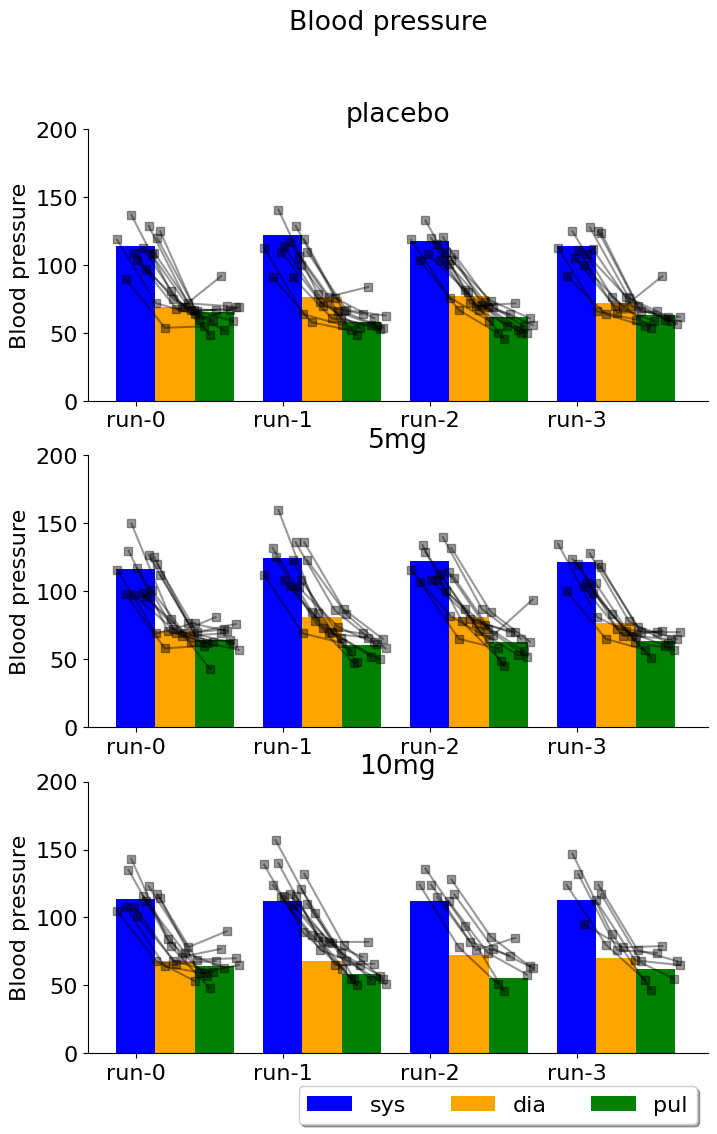

In [143]:
#We have groups_dict_mean which gives us, for each type of sessions, the average 12 blood measurements. The first 3 are the sys, dial and pul of run-1. The next 3 are the sys, dial and pul of run-2, etc.
#We have Blood_pressure_dict which gives us, for each session of each participant, the 12 blood measurements. The first 3 are the sys, dial and pul of run-1. The next 3 are the sys, dial and pul of run-2, etc.

#We want to plot three subplot on top of each other. The first one shows the results for the sessions 'placebo', the second one for the sessions '5mg' and the third one for the sessions '10mg'.
#For each subplot, we want to regroup the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
#So for example, the first subplot is 'placebo' sessions. For each participant, we plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
print(len(groups_dict['placebo'])/3)
the_space = np.linspace(-0.25, 0.25, (len(groups_dict['placebo'])))
participant_list = [participant[:-6] for participant in groups_dict['placebo']]
print(the_space)
print(participant_list)

# Initialize the figure
fig5, ax5 = pl.subplots(3, 1, figsize=(8, 12))
run_labels = np.array([0.0, 0.4, 0.8])
#For each type of sessions, plot the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    print(groups_dict_mean[group])
    ax5[i-1].bar(run_labels, groups_dict_mean[group][0:3], color=['blue', 'orange', 'green'], width=0.4, label=['sys', 'dia','pul'])
    ax5[i-1].bar(run_labels+1.5, groups_dict_mean[group][3:6], color=['blue', 'orange', 'green'], width=0.4)
    ax5[i-1].bar(run_labels+3, groups_dict_mean[group][6:9], color=['blue', 'orange', 'green'], width=0.4)
    ax5[i-1].bar(run_labels+4.5, groups_dict_mean[group][9:12], color=['blue', 'orange', 'green'], width=0.4)

#For each participant, plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    #for each session, check if it's placebo or 5mg or 10mg
    for participant_session in groups_dict[group]:
        for participant, sessions in Blood_pressure_dict.items():
            for session, res in sessions.items():
                #if the participant_session is in the right group (placebo, 5mg or 10mg), then plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
                if participant_session == participant + '_' + session:
                    run_labels += the_space[participant_list.index(participant)]
                    ax5[i].plot(run_labels, res[0:3], alpha=0.4, marker='s', color='black')
                    ax5[i].plot(run_labels+1.5, res[3:6], alpha=0.4, marker='s', color='black')
                    ax5[i].plot(run_labels+3, res[6:9], alpha=0.4, marker='s', color='black')
                    ax5[i].plot(run_labels+4.5, res[9:12], alpha=0.4, marker='s', color='black')
                    run_labels = np.array([0.0, 0.4, 0.8])

    ax5[i].set_xticks([0, 1.5, 3,4.5])
    ax5[i].set_xticklabels(['run-0', 'run-1', 'run-2', 'run-3'])
    print(group)
    ax5[i].set_title(group)
    ax5[i].set_ylim([0, 200])
    ax5[i].set_ylabel('Blood pressure')

#legend for (sys, dia, pul)
ax5[2].legend(loc='upper right', bbox_to_anchor=(1.0, -0.08), fancybox=True, shadow=True, ncol=3)

#fig5.subplots_adjust(top=0.8, right=1.2)
fig5.suptitle('Blood pressure')

fig5.show()

        

[113.33333333  68.33333333  64.33333333 111.83333333  68.16666667
  58.41666667 112.33333333  72.5         55.83333333 113.
  70.          62.36363636]
[114.46153846  69.          65.92307692 122.5         77.
  58.08333333 117.58333333  77.25        61.66666667 114.45454545
  71.90909091  63.18181818]
[116.54545455  70.90909091  64.54545455 124.66666667  81.16666667
  60.25       122.28571429  81.          62.71428571 121.71428571
  76.42857143  63.14285714]
placebo
5mg
10mg


/tmp/ipykernel_72936/2912719155.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig6.show()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and

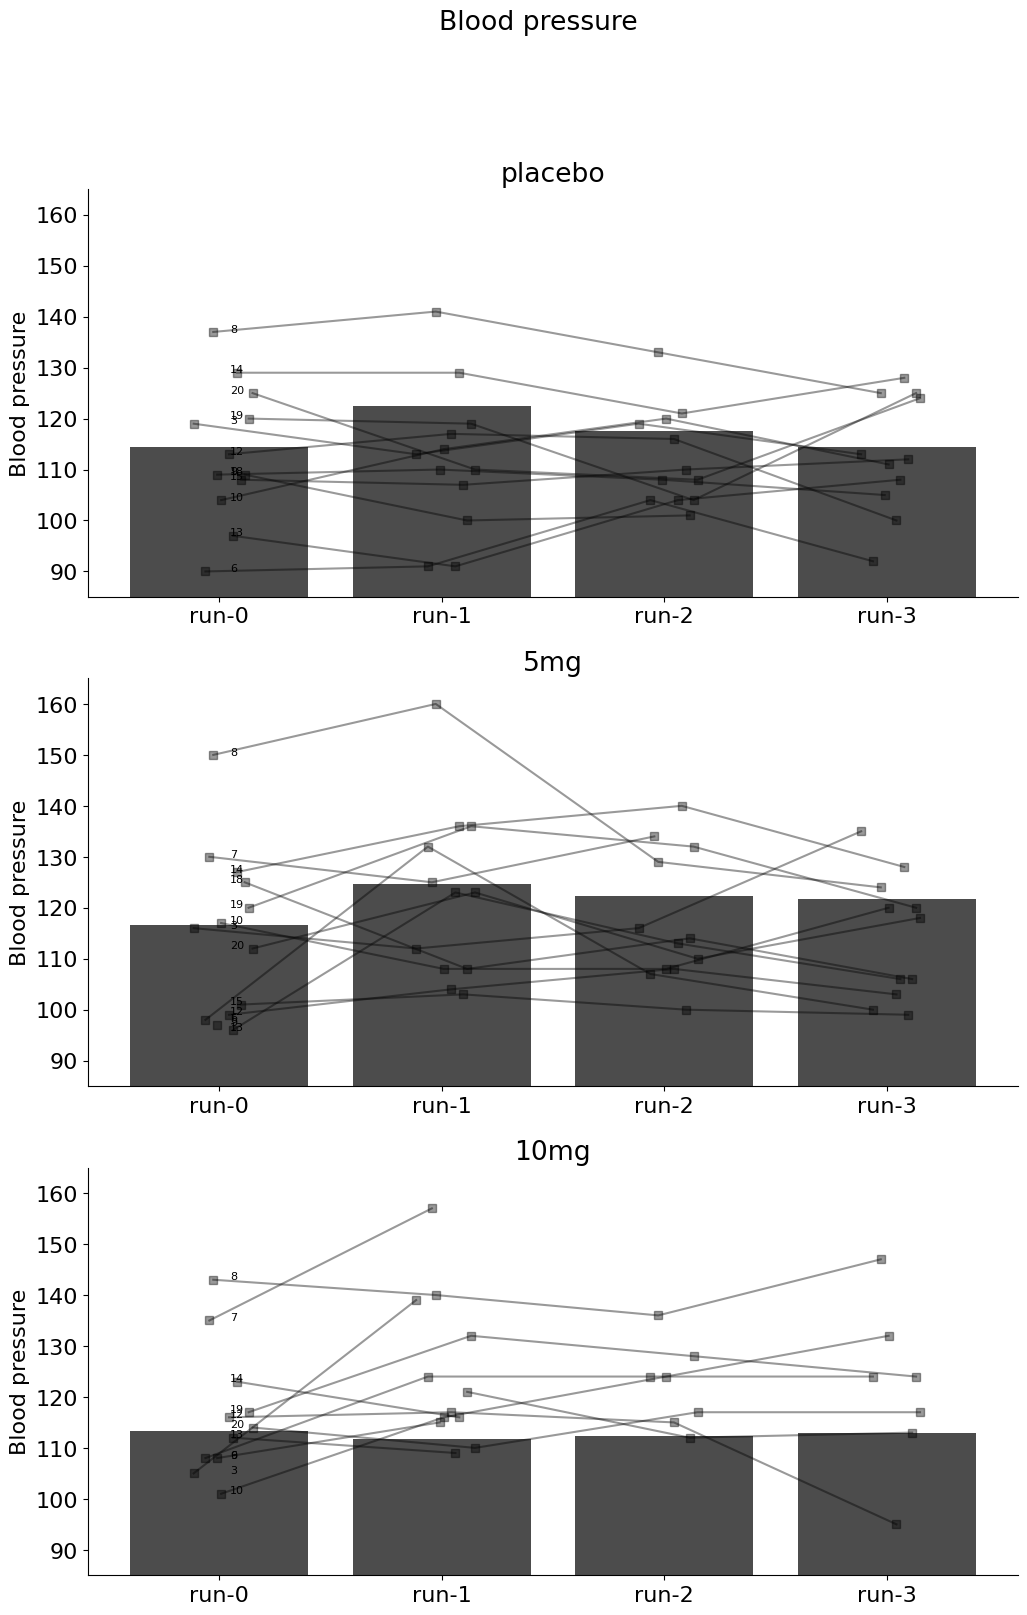

In [144]:
#plot only the sys measurements, not the dia and pul, which mean that we plot only the first measurement of each group of 3 measurements
# Initialize the figure
# Initialize the figure
fig6, ax6 = pl.subplots(3, 1, figsize=(12, 18))
the_space = np.linspace(-0.15, 0.15, (len(groups_dict['placebo'])))
run_labels = np.array([0.0, 1.0, 2.0, 3.0])
labels = ['run-0', 'run-1', 'run-2', 'run-3']
#For each type of sessions, plot the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    print(groups_dict_mean[group])
    ax6[i-1].bar(labels, [groups_dict_mean[group][0],groups_dict_mean[group][3],groups_dict_mean[group][6] ,groups_dict_mean[group][9]], color='black', alpha=0.7)


#For each participant, plot the runs
for i, group in enumerate(['placebo', '5mg', '10mg']):
    #for each session, check if it's placebo or 5mg or 10mg
    for participant_session in groups_dict[group]:
        for participant, sessions in Blood_pressure_dict.items():
            for session, res in sessions.items():
                #if the participant_session is in the right group (placebo, 5mg or 10mg), then plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
                if participant_session == participant + '_' + session:
                    run_labels += the_space[participant_list.index(participant)]
                    ax6[i].plot(run_labels, [res[0],res[3], res[6], res[9]], alpha=0.4, marker='s', color='black')
                    #Add the number of the participant as text label for run-1
                    ax6[i].text(0.05, res[0], str(int(participant[4:7])), fontsize=8)
                    run_labels = np.array([0.0, 1.0, 2.0, 3.0])

    #ax6[i].set_xticks(run_labels)
    #ax6[i].set_xticklabels(['run-0', 'run-1', 'run-2', 'run-3'])
    print(group)
    ax6[i].set_title(group)
    ax6[i].set_ylim([85, 165])
    ax6[i].set_ylabel('Blood pressure')

#fig5.subplots_adjust(top=0.8, right=1.2)
fig6.suptitle('Blood pressure')

fig6.show()


In [ ]:
#new dictionary with the same structure as Blood_pressure_dict but we average each 3 values (sys, dia, pul) into one value (if the three values are nan, then the average is nan)
for participant, sessions in Blood_pressure_dict.items():
    for session, res in sessions.items():
        for i in range(0, len(res), 3):
            print(res[i:i+3])

Blood_pressure_dict_mean = {participant: {session: [np.nanmean(res[i:i+3]) for i in range(0, len(res), 3)] for session, res in sessions.items()} for participant, sessions in Blood_pressure_dict.items()}
Blood_pressure_dict_mean

#save as npy
np.save('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/Global_average_group_results_BP.npy', Blood_pressure_dict_mean)
Blood_pressure_dict_mean


In [161]:
groups_dict_mean

{'placebo': array([113.33333333,  68.33333333,  64.33333333, 111.83333333,
         68.16666667,  58.41666667, 112.33333333,  72.5       ,
         55.83333333, 113.        ,  70.        ,  62.36363636]),
 '5mg': array([114.46153846,  69.        ,  65.92307692, 122.5       ,
         77.        ,  58.08333333, 117.58333333,  77.25      ,
         61.66666667, 114.45454545,  71.90909091,  63.18181818]),
 '10mg': array([116.54545455,  70.90909091,  64.54545455, 124.66666667,
         81.16666667,  60.25      , 122.28571429,  81.        ,
         62.71428571, 121.71428571,  76.42857143,  63.14285714])}

In [163]:
group_dict_st

{'placebo': array([12.85387966,  6.56167323, 10.749677  , 13.74671678,  6.56802017,
         8.82664841,  9.12262146,  4.60977223,  6.95021982, 11.02888769,
         4.55272146,  9.90199913]),
 '5mg': array([15.57915464,  5.51919727,  9.63536386, 16.12709935,  7.38241153,
         7.123416  , 12.27774635,  7.00148794, 12.45213056, 11.64914071,
         6.22976062,  6.11731049]),
 '10mg': array([12.17571082,  6.94726297, 11.13033232, 13.89444333,  9.63356401,
         8.9918945 ,  7.68513009,  6.4807407 , 12.09148798, 14.96390214,
         6.27596647, 10.73616813])}

In [165]:
Blood_pressure_dict

{'sub-001': {'intake': [nan, nan, nan],
  'ses-1': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  'ses-2': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  'ses-3': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]},
 'sub-002': {'intake': [nan, nan, nan],
  'ses-1': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  'ses-2': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  'ses-3': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]},
 'sub-003': {'intake': [113.0, 73.0, 59.0],
  'ses-1': [116.0,
   69.0,
   77.0,
   112.0,
   69.0,
   62.0,
   116.0,
   82.0,
   65.0,
   135.0,
   81.0,
   67.0],
  'ses-2': [105.0,
   68.0,
   53.0,
   139.0,
   89.0,
   62.0,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan],
  'ses-3': [119.0,
   72.0,
   64.0,
   113.0,
   64.0,
   56.0,
   119.0,
   76.0,
   59.0,
   113.0,
   66.0,
   60.0]},
 'sub-004': {'intake': [nan, nan, nan],
  'ses-1': [nan, nan, nan, nan, nan, 

[113.33333333  68.33333333  64.33333333 111.83333333  68.16666667
  58.41666667 112.33333333  72.5         55.83333333 113.
  70.          62.36363636]
[114.46153846  69.          65.92307692 122.5         77.
  58.08333333 117.58333333  77.25        61.66666667 114.45454545
  71.90909091  63.18181818]
[116.54545455  70.90909091  64.54545455 124.66666667  81.16666667
  60.25       122.28571429  81.          62.71428571 121.71428571
  76.42857143  63.14285714]
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.05
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.04411764705882353
things
[119.0, 72.0, 64.0, 113.0, 64.0, 56.0, 119.0, 76.0, 59.0, 113.0, 66.0, 60.0]
-0.03823529411764706
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.03235294117647059
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.02647058823529412
things
[90.0, 54.0, 55.0, 91.0, 58.0, 52.0, 104.0, 67.0, 50.0, 92.0, 64.0, 55.0]
-0.020588

/tmp/ipykernel_72936/2753547016.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig6.show()


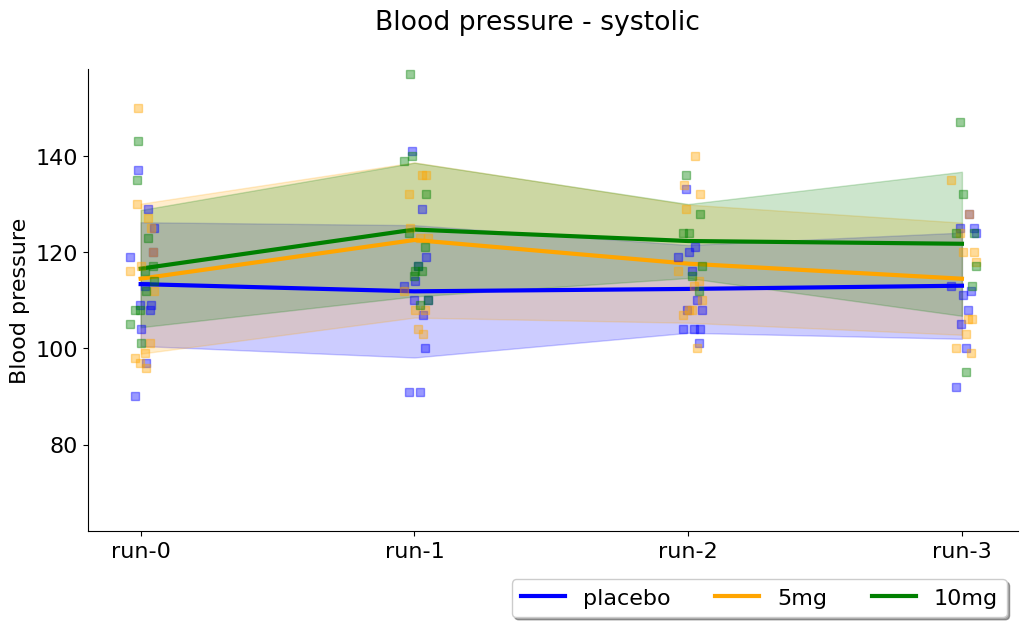

In [169]:
#plot the 4 runs of Blood_pressure_dict_mean
# Initialize the figure
fig6, ax6 = pl.subplots(figsize=(12, 6))
run_labels = np.array([0.0, 1.0, 2.0, 3.0])
labels = ['run-0', 'run-1', 'run-2', 'run-3']
colors_condition = {'placebo': 'blue', '5mg': 'orange', '10mg': 'green'}
the_space = np.linspace(-0.05, 0.05, (len(groups_dict['placebo'])))

#For each type of sessions, plot the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    print(groups_dict_mean[group])
    ax6.plot(labels, [groups_dict_mean[group][0],groups_dict_mean[group][3], groups_dict_mean[group][6] ,groups_dict_mean[group][9]] ,color=colors_condition[group], linewidth=3, label=group)
    #standard deviation
    ax6.fill_between(labels, [groups_dict_mean[group][0]-group_dict_st[group][0],groups_dict_mean[group][3]-group_dict_st[group][3], groups_dict_mean[group][6]-group_dict_st[group][6] ,groups_dict_mean[group][9]-group_dict_st[group][9]], [groups_dict_mean[group][0]+group_dict_st[group][0],groups_dict_mean[group][3]+group_dict_st[group][3], groups_dict_mean[group][6]+group_dict_st[group][6] ,groups_dict_mean[group][9]+group_dict_st[group][9]], color=colors_condition[group], alpha=0.2)    

#For each participant, plot the runs
for i, group in enumerate(['placebo', '5mg', '10mg']):
    #for each session, check if it's placebo or 5mg or 10mg
    for participant_session in groups_dict[group]:
        for participant, sessions in Blood_pressure_dict.items():
            for session, res in sessions.items():
                #if the participant_session is in the right group (placebo, 5mg or 10mg), then plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
                if participant_session == participant + '_' + session:
                    run_labels += the_space[participant_list.index(participant)]
                    ax6.plot(run_labels, [res[0],res[3],res[6],res[9]], alpha=0.4, marker='s', color=colors_condition[group],linestyle="None")
                    print('things')
                    print(res)
                    print(run_labels[0])
                    #ax6.text(run_labels[0] + 0.02, res[0], str(participant_list.index(participant)), fontsize=10)
                    run_labels = np.array([0.0, 1.0, 2.0, 3.0])

ax6.set_xticks([0, 1, 2,3])
ax6.set_xticklabels(['run-0', 'run-1', 'run-2', 'run-3'])
ax6.set_ylim([62, 158])
ax6.set_ylabel('Blood pressure')

ax6.legend(loc='upper right', bbox_to_anchor=(1.0, -0.08), fancybox=True, shadow=True, ncol=3)

#fig5.subplots_adjust(top=0.8, right=1.2)
fig6.suptitle('Blood pressure - systolic')

fig6.show()

[113.33333333  68.33333333  64.33333333 111.83333333  68.16666667
  58.41666667 112.33333333  72.5         55.83333333 113.
  70.          62.36363636]
[114.46153846  69.          65.92307692 122.5         77.
  58.08333333 117.58333333  77.25        61.66666667 114.45454545
  71.90909091  63.18181818]
[116.54545455  70.90909091  64.54545455 124.66666667  81.16666667
  60.25       122.28571429  81.          62.71428571 121.71428571
  76.42857143  63.14285714]
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.05
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.04411764705882353
things
[119.0, 72.0, 64.0, 113.0, 64.0, 56.0, 119.0, 76.0, 59.0, 113.0, 66.0, 60.0]
-0.03823529411764706
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.03235294117647059
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.02647058823529412
things
[90.0, 54.0, 55.0, 91.0, 58.0, 52.0, 104.0, 67.0, 50.0, 92.0, 64.0, 55.0]
-0.020588

/tmp/ipykernel_72936/1920671734.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig6.show()


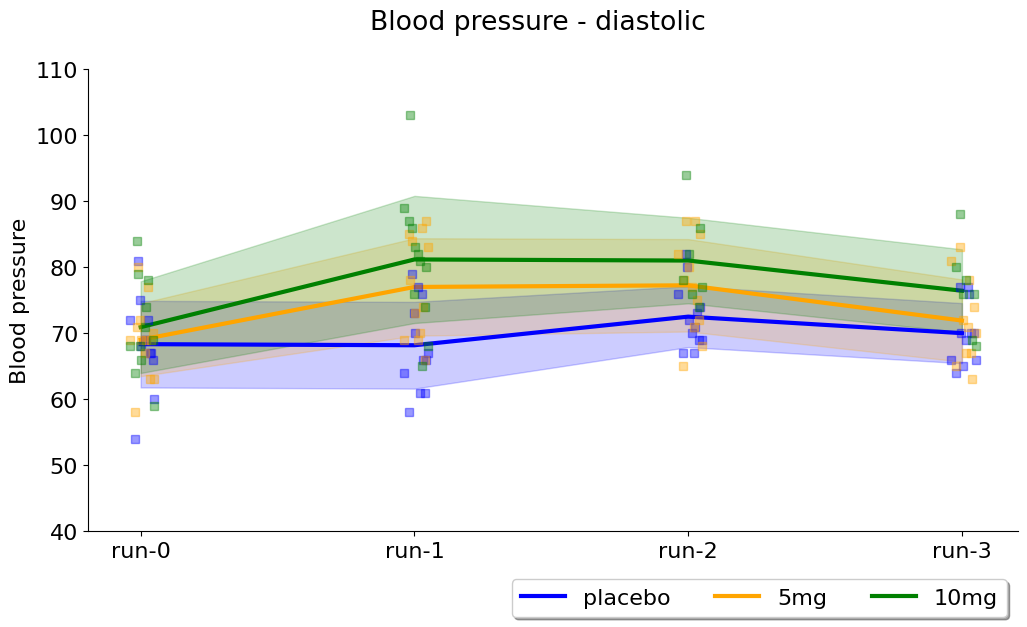

In [172]:
#plot the 4 runs of Blood_pressure_dict_mean
# Initialize the figure
fig6, ax6 = pl.subplots(figsize=(12, 6))
run_labels = np.array([0.0, 1.0, 2.0, 3.0])
labels = ['run-0', 'run-1', 'run-2', 'run-3']
colors_condition = {'placebo': 'blue', '5mg': 'orange', '10mg': 'green'}
the_space = np.linspace(-0.05, 0.05, (len(groups_dict['placebo'])))

#For each type of sessions, plot the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    print(groups_dict_mean[group])
    ax6.plot(labels, [groups_dict_mean[group][1],groups_dict_mean[group][4], groups_dict_mean[group][7] ,groups_dict_mean[group][10]] ,color=colors_condition[group], linewidth=3, label=group)
    #standard deviation
    ax6.fill_between(labels, [groups_dict_mean[group][1]-group_dict_st[group][1],groups_dict_mean[group][4]-group_dict_st[group][4], groups_dict_mean[group][7]-group_dict_st[group][7] ,groups_dict_mean[group][10]-group_dict_st[group][10]], [groups_dict_mean[group][1]+group_dict_st[group][1],groups_dict_mean[group][4]+group_dict_st[group][4], groups_dict_mean[group][7]+group_dict_st[group][7] ,groups_dict_mean[group][10]+group_dict_st[group][10]], color=colors_condition[group], alpha=0.2)

#For each participant, plot the runs
for i, group in enumerate(['placebo', '5mg', '10mg']):
    #for each session, check if it's placebo or 5mg or 10mg
    for participant_session in groups_dict[group]:
        for participant, sessions in Blood_pressure_dict.items():
            for session, res in sessions.items():
                #if the participant_session is in the right group (placebo, 5mg or 10mg), then plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
                if participant_session == participant + '_' + session:
                    run_labels += the_space[participant_list.index(participant)]
                    ax6.plot(run_labels, [res[1],res[4], res[7], res[10]], alpha=0.4, marker='s', color=colors_condition[group],linestyle="None")
                    print('things')
                    print(res)
                    print(run_labels[0])
                    #ax6.text(run_labels[0] + 0.02, res[0], str(participant_list.index(participant)), fontsize=10)
                    run_labels = np.array([0.0, 1.0, 2.0, 3.0])

ax6.set_xticks([0, 1, 2,3])
ax6.set_xticklabels(['run-0', 'run-1', 'run-2', 'run-3'])
ax6.set_ylim([40, 110])
ax6.set_ylabel('Blood pressure')

ax6.legend(loc='upper right', bbox_to_anchor=(1.0, -0.08), fancybox=True, shadow=True, ncol=3)

#fig5.subplots_adjust(top=0.8, right=1.2)
fig6.suptitle('Blood pressure - diastolic')

fig6.show()


[113.33333333  68.33333333  64.33333333 111.83333333  68.16666667
  58.41666667 112.33333333  72.5         55.83333333 113.
  70.          62.36363636]
[114.46153846  69.          65.92307692 122.5         77.
  58.08333333 117.58333333  77.25        61.66666667 114.45454545
  71.90909091  63.18181818]
[116.54545455  70.90909091  64.54545455 124.66666667  81.16666667
  60.25       122.28571429  81.          62.71428571 121.71428571
  76.42857143  63.14285714]
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.05
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.04411764705882353
things
[119.0, 72.0, 64.0, 113.0, 64.0, 56.0, 119.0, 76.0, 59.0, 113.0, 66.0, 60.0]
-0.03823529411764706
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.03235294117647059
things
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
-0.02647058823529412
things
[90.0, 54.0, 55.0, 91.0, 58.0, 52.0, 104.0, 67.0, 50.0, 92.0, 64.0, 55.0]
-0.020588

/tmp/ipykernel_72936/2769124703.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig6.show()


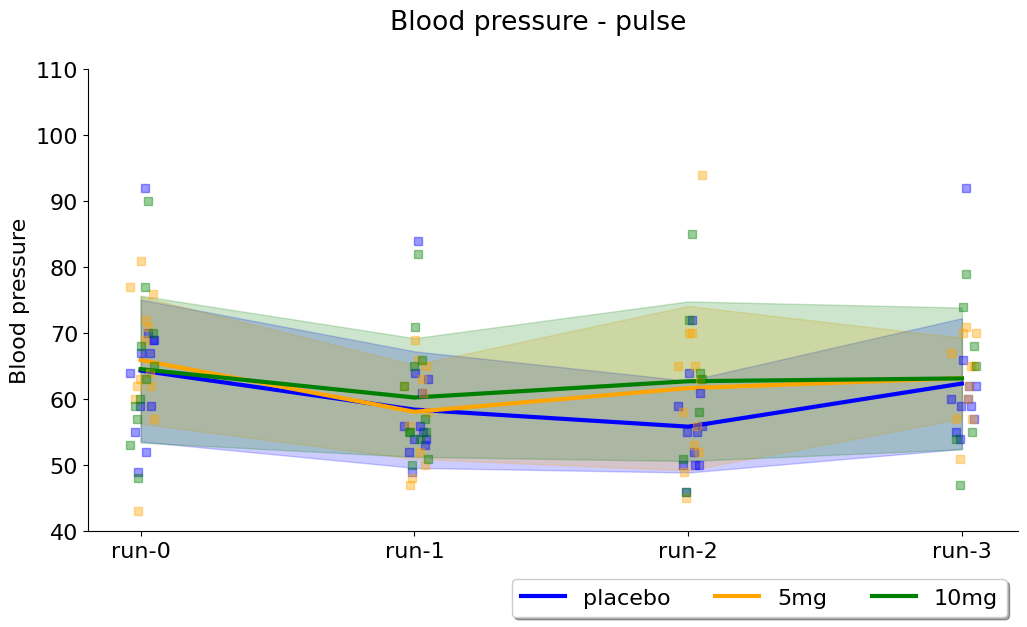

In [173]:
#plot the 4 runs of Blood_pressure_dict_mean
# Initialize the figure
fig6, ax6 = pl.subplots(figsize=(12, 6))
run_labels = np.array([0.0, 1.0, 2.0, 3.0])
labels = ['run-0', 'run-1', 'run-2', 'run-3']
colors_condition = {'placebo': 'blue', '5mg': 'orange', '10mg': 'green'}
the_space = np.linspace(-0.05, 0.05, (len(groups_dict['placebo'])))

#For each type of sessions, plot the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    print(groups_dict_mean[group])
    ax6.plot(labels, [groups_dict_mean[group][2],groups_dict_mean[group][5], groups_dict_mean[group][8] ,groups_dict_mean[group][11]] ,color=colors_condition[group], linewidth=3, label=group)
    #standard deviation
    ax6.fill_between(labels, [groups_dict_mean[group][2]-group_dict_st[group][2],groups_dict_mean[group][5]-group_dict_st[group][5], groups_dict_mean[group][8]-group_dict_st[group][8] ,groups_dict_mean[group][11]-group_dict_st[group][11]], [groups_dict_mean[group][2]+group_dict_st[group][2],groups_dict_mean[group][5]+group_dict_st[group][5], groups_dict_mean[group][8]+group_dict_st[group][8] ,groups_dict_mean[group][11]+group_dict_st[group][11]], color=colors_condition[group], alpha=0.2)
#For each participant, plot the runs
for i, group in enumerate(['placebo', '5mg', '10mg']):
    #for each session, check if it's placebo or 5mg or 10mg
    for participant_session in groups_dict[group]:
        for participant, sessions in Blood_pressure_dict.items():
            for session, res in sessions.items():
                #if the participant_session is in the right group (placebo, 5mg or 10mg), then plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
                if participant_session == participant + '_' + session:
                    run_labels += the_space[participant_list.index(participant)]
                    ax6.plot(run_labels, [res[2],res[5], res[8], res[11]], alpha=0.4, marker='s', color=colors_condition[group],linestyle="None")
                    print('things')
                    print(res)
                    print(run_labels[0])
                    #ax6.text(run_labels[0] + 0.02, res[0], str(participant_list.index(participant)), fontsize=10)
                    run_labels = np.array([0.0, 1.0, 2.0, 3.0])

ax6.set_xticks([0, 1, 2,3])
ax6.set_xticklabels(['run-0', 'run-1', 'run-2', 'run-3'])
ax6.set_ylim([40, 110])
ax6.set_ylabel('Blood pressure')

ax6.legend(loc='upper right', bbox_to_anchor=(1.0, -0.08), fancybox=True, shadow=True, ncol=3)

#fig5.subplots_adjust(top=0.8, right=1.2)
fig6.suptitle('Blood pressure - pulse')

fig6.show()


=> Observations 

When comparing to SE questionnaires, it seems that the evolution of the participant state though the runs are characterized by two things. The peak of the experience can be located at "run-2" for both the SE and the blood pressure. The SE is characterized by an increase in the response of the participant to the drug. The blood pressure however is only characterized by a more intensed variation e.g. if some participants see their average blood pressure increasing while other decrease, the common feature is that there is more variation between placebo and dosage-related sessions. 
In oother words :
The peak of the experience can be located at "run-2" for both the SE and the blood pressure. This suggests that the effects of the drug may be most pronounced at this point in time, and that the subjective experiences and physiological responses may be closely linked (which is confirmed by other analyses of course https://www.researchgate.net/publication/370652134_Dose-response_relationships_of_LSD-induced_subjective_experiences_in_humans , https://journals.sagepub.com/doi/10.1177/0269881121992676 *Dose–response relationships of psilocybin-induced subjective experiences in humans*). The SE is characterized by an increase in the response of the participant to the drug. This may reflect the intensity of the subjective experiences induced by the drug, and may be related to the dose of the drug. The blood pressure, on the other hand, is only characterized by a more intense variation. This may reflect the physiological effects of the drug, which can vary widely between individuals and may be influenced by factors such as dose, route of administration, and individual differences in metabolism and sensitivity to the drug.

"As it is well-known that the quality of the psilocybin-induced experience is not only determined by dose, but also by non-pharmacological factors like the psychological state of the individual and the setting of psilocybin administration (Hartogsohn, 2017; Leary et al., 1963; Zinberg, 1984)," --> The results make sense


# Psychophysics data

We could use stats to evaluate correlation between the visual intensity (for example Elementary Imagery EI) and the blood pressure response using Blood_pressure_dict and group results

In [105]:
#print group_results_ASC_10 from outpath 
group_results_ASC_10 = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_ASC_10.npy', allow_pickle=True).item()
group_results_ASC_10

{'sub-005': {'ses-2': {'cat_5D': {'mean': {'OBN': 3.21,
     'VIR': 3.056,
     'AUA': 0.764,
     'DED': 1.904,
     'VRS': 5.247},
    'std_dev': {'OBN': 3.162,
     'VIR': 2.763,
     'AUA': 1.653,
     'DED': 2.379,
     'VRS': 3.329}},
   'cat_11D': {'mean': {'ICC': 0.952,
     'SE': 0.0,
     'BS': 1.852,
     'EI': 3.333,
     'EU': 2.222,
     'AVS': 8.519,
     'DE': 2.963,
     'CMP': 6.297,
     'ANX': 1.297,
     'CI': 5.186,
     'IS': 3.333},
    'std_dev': {'ICC': 1.506,
     'SE': 0.0,
     'BS': 1.386,
     'EI': 0.907,
     'EU': 2.434,
     'AVS': 0.523,
     'DE': 2.283,
     'CMP': 1.889,
     'ANX': 2.436,
     'CI': 2.619,
     'IS': 1.814}},
   'type': '5mg'},
  'ses-1': {'cat_5D': {'mean': {'OBN': 0.247,
     'VIR': 3.056,
     'AUA': 0.0,
     'DED': 0.477,
     'VRS': 0.123},
    'std_dev': {'OBN': 0.873,
     'VIR': 3.661,
     'AUA': 0.0,
     'DED': 1.7,
     'VRS': 0.509}},
   'cat_11D': {'mean': {'ICC': 0.318,
     'SE': 0.0,
     'BS': 0.0,
     'EI': 0

In [106]:
#print group_results_ASC from outpath 
group_results_BP = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_BP.npy', allow_pickle=True).item()
group_results_BP

{'sub-001': {'intake': [nan, nan, nan],
  'ses-1': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  'ses-2': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  'ses-3': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]},
 'sub-002': {'intake': [nan, nan, nan],
  'ses-1': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  'ses-2': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  'ses-3': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]},
 'sub-003': {'intake': [113.0, 73.0, 59.0],
  'ses-1': [116.0,
   69.0,
   77.0,
   112.0,
   69.0,
   62.0,
   116.0,
   82.0,
   65.0,
   135.0,
   81.0,
   67.0],
  'ses-2': [105.0,
   68.0,
   53.0,
   139.0,
   89.0,
   62.0,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan],
  'ses-3': [119.0,
   72.0,
   64.0,
   113.0,
   64.0,
   56.0,
   119.0,
   76.0,
   59.0,
   113.0,
   66.0,
   60.0]},
 'sub-004': {'intake': [nan, nan, nan],
  'ses-1': [nan, nan, nan, nan, nan, 

In [5]:
# Transform group_results_ASC_10 with participant, sessions, categories, subcategories, and scores by group with placebo, cat and subcats with tab of scores for each subcat 

#initialize a dictionnary with the three types of sessions as keys and an empty list as value
groups_= {group: {'cat_5D' : {},'cat_11D': {}} for group in groups_dict}
for subcats in group_results_ASC_10['sub-001']['ses-1']['cat_11D']['mean']:
    groups_['placebo']['cat_11D'][subcats] = []
for subcats in group_results_ASC_10['sub-001_ses-3']['cat_5D']['mean']:
    groups_['placebo']['cat_5D'][subcats] = []

for participant, sessions in group_results_ASC_10.items():
                for session, cats in sessions.items():
                    for cat, values in cats.items():
                        if cat != 'type':
                            for calculus, sub_cats in values.items():
                                if calculus == 'mean':
                                    for sub_cat, value in sub_cats.items():
                                        groups_[group_results_ASC_10[participant][session]['type']][cat][sub_cat].append(value)



groups_


NameError: name 'groups_dict' is not defined

<Axes: ylabel='None-None'>

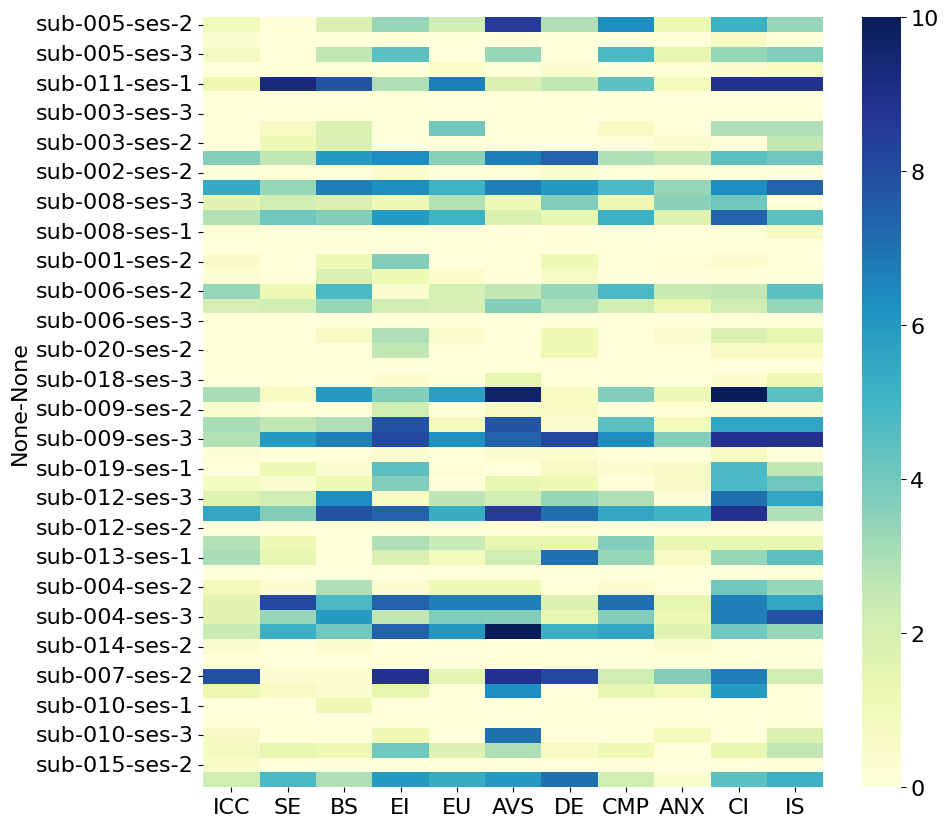

In [122]:
import seaborn as sns
#Correlation matrices for ASC cat_11D dimensions
# Initialize the figure
fig7, ax7 = pl.subplots(figsize=(10, 10))
# prepare the dataset for correlation matrix, select {'sub-005': {'ses-2': {'cat_5D': {'mean': {'OBN': 3.2099999999999995, 'VIR': 3.0555555555555554, 'AUA': 0.7644444444444444, 'DED': 1.9044444444444446, 'VRS': 5.246666666666667}, 'std_dev': {'OBN': 2.846, 'VIR': 2.487, 'AUA': 1.488, 'DED': 2.141, 'VRS': 2.996                }            }, 'cat_11D': {'mean': {'ICC': 0.9522222222222223, 'SE': 0.0, 'BS': 1.8522222222222224, 'EI': 3.3333333333333335, 'EU': 2.2222222222222223, 'AVS': 8.518888888888888, 'DE': 2.963333333333333, 'CMP': 6.296666666666667, 'ANX': 1.2966666666666666, 'CI': 5.185555555555556, 'IS': 3.3333333333333335                }, 'std_dev': {'ICC': 1.355, 'SE': 0.0, 'BS': 1.247, 'EI': 0.816, 'EU': 2.191, 'AVS': 0.471, 'DE': 2.055, 'CMP': 1.7, 'ANX': 2.192, 'CI': 2.357, 'IS': 1.633                }            }, 'type': '5mg'        }
# The progression we want to study statistically is the progression of the mean of the 11 ASC categories over placebo, 5mg and 10mg sessions. We want to have the correlation matrix for the mean of the 11 ASC categories over placebo, 5mg and 10mg sessions.

#Do a df for the mean of the 11 ASC categories over placebo, 5mg and 10mg session
